# Data Science Tweets 2010-2021
## by Eytan Babaev 315740522 and Yuval Varshavski 207326703

#### Dataset link: https://www.kaggle.com/datasets/ruchi798/data-science-tweets

#Importing and creating the DataFrame

In [ ]:
#setting up Kaggle
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"eytanbabaev","key":"59c77c75e0525869dbb40166ae6ff110"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
if not os.path.exists('./datasets/data-science-tweets'):
  !mkdir ./datasets
  !mkdir ./datasets/data-science-tweets
  # download the dataset from Kaggle and unzip it
  !kaggle datasets download -d ruchi798/data-science-tweets -p ./datasets/data-science-tweets
  !unzip ./datasets/data-science-tweets/*.zip  -d ./datasets/data-science-tweets/


 90% 49.0M/54.4M [00:00<00:00, 70.6MB/s]
100% 54.4M/54.4M [00:00<00:00, 66.9MB/s]
Archive:  ./datasets/data-science-tweets/data-science-tweets.zip
  inflating: ./datasets/data-science-tweets/tweets/data_analysis.csv  
  inflating: ./datasets/data-science-tweets/tweets/data_science.csv  
  inflating: ./datasets/data-science-tweets/tweets/data_visualization.csv  


In [ ]:
import pandas as pd

df = pd.read_csv("/content/datasets/data-science-tweets/tweets/data_science.csv")
df.head()

<ipython-input-3-c8375d26d3f6>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/datasets/data-science-tweets/tweets/data_science.csv")


id      conversation_id               created_at  \
0  1406400408545804288  1406400396264943616  2021-06-20 05:26:01 IST   
1  1406390341176016897  1406390341176016897  2021-06-20 04:46:01 IST   
2  1406386311481774083  1406386311481774083  2021-06-20 04:30:00 IST   
3  1406383545153638402  1406383545153638402  2021-06-20 04:19:01 IST   
4  1406358632648818689  1406358632648818689  2021-06-20 02:40:01 IST   

         date      time  timezone              user_id         username  \
0  2021-06-20  05:26:01       530  1113747629282930688  ballouxfrancois   
1  2021-06-20  04:46:01       530   788898706586275840     tdatascience   
2  2021-06-20  04:30:00       530             19402238      sciencenews   
3  2021-06-20  04:19:01       530   788898706586275840     tdatascience   
4  2021-06-20  02:40:01       530   788898706586275840     tdatascience   

                    name place  ... geo source user_rt_id user_rt retweet_id  \
0  Prof Francois Balloux   NaN  ... NaN    NaN        NaN     NaN        NaN   
1   Towards Data Science   NaN  ... NaN    NaN        NaN     NaN        NaN   
2           Science News   NaN  ... NaN    NaN        NaN     NaN        NaN   
3   Towards Data Science   NaN  ... NaN    NaN        NaN     NaN        NaN   
4   Towards Data Science   NaN  ... NaN    NaN        NaN     NaN        NaN   

   reply_to  retweet_date  translate trans_src trans_dest  
0        []           NaN        NaN       NaN        NaN  
1        []           NaN        NaN       NaN        NaN  
2        []           NaN        NaN       NaN        NaN  
3        []           NaN        NaN       NaN        NaN  
4        []           NaN        NaN       NaN        NaN  

[5 rows x 36 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241386 entries, 0 to 241385
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               241386 non-null  int64  
 1   conversation_id  241386 non-null  int64  
 2   created_at       241386 non-null  object 
 3   date             241386 non-null  object 
 4   time             241386 non-null  object 
 5   timezone         241386 non-null  int64  
 6   user_id          241386 non-null  int64  
 7   username         241386 non-null  object 
 8   name             241386 non-null  object 
 9   place            354 non-null     object 
 10  tweet            241386 non-null  object 
 11  language         241386 non-null  object 
 12  mentions         241386 non-null  object 
 13  urls             241386 non-null  object 
 14  photos           241386 non-null  object 
 15  replies_count    241386 non-null  int64  
 16  retweets_count   241386 non-null  int6

In [ ]:
# filtering the df
df['year'] = pd.DatetimeIndex(df['date']).year
df = df[['id','conversation_id','date','user_id','name','tweet','language','year','replies_count','likes_count','retweets_count','hashtags']]
df.head()

id      conversation_id        date              user_id  \
0  1406400408545804288  1406400396264943616  2021-06-20  1113747629282930688   
1  1406390341176016897  1406390341176016897  2021-06-20   788898706586275840   
2  1406386311481774083  1406386311481774083  2021-06-20             19402238   
3  1406383545153638402  1406383545153638402  2021-06-20   788898706586275840   
4  1406358632648818689  1406358632648818689  2021-06-20   788898706586275840   

                    name                                              tweet  \
0  Prof Francois Balloux  What can be done?  - Never blindly trust an ab...   
1   Towards Data Science  "We need a paradigm shift from model-centric t...   
2           Science News  Using high-resolution satellite data and compu...   
3   Towards Data Science  .@Stephenson_Data shares four steps that will ...   
4   Towards Data Science  "Curricula is inherently brittle in a world wh...   

  language  year  replies_count  likes_count  retweets_count hashtags  
0       en  2021              6          144              10       []  
1       en  2021              0           27               7       []  
2       en  2021              2           49              11       []  
3       en  2021              0            6               3       []  
4       en  2021              0            9               1       []

In [ ]:
# Filtering condition: selecting rows where likes_count is greater than 10
condition = df['likes_count'] > 10

# Applying the filtering condition
filtered_df = df[condition]

df = filtered_df
df

id      conversation_id        date  \
0       1406400408545804288  1406400396264943616  2021-06-20   
1       1406390341176016897  1406390341176016897  2021-06-20   
2       1406386311481774083  1406386311481774083  2021-06-20   
5       1406350577756524555  1406350577756524555  2021-06-20   
9       1406334476905500679  1406334476905500679  2021-06-20   
...                     ...                  ...         ...   
241148          15339113540          15339113540  2010-06-03   
241157          15271575408          15271575408  2010-06-03   
241165          15263338940          15263338940  2010-06-02   
241259          12278160230          12278160230  2010-04-16   
241385           7333962778           7333962778  2010-01-03   

                    user_id                   name  \
0       1113747629282930688  Prof Francois Balloux   
1        788898706586275840   Towards Data Science   
2                  19402238           Science News   
5        788898706586275840   Towards Data Science   
9                 534563976             Kirk Borne   
...                     ...                    ...   
241148             11069462         O'Reilly Media   
241157              2384071             timoreilly   
241165             14984090         O'Reilly Radar   
241259             19658826          New Scientist   
241385             16997044               BBH Labs   

                                                    tweet language  year  \
0       What can be done?  - Never blindly trust an ab...       en  2021   
1       "We need a paradigm shift from model-centric t...       en  2021   
2       Using high-resolution satellite data and compu...       en  2021   
5       Many common colour maps distort data through u...       en  2021   
9       Demystifying #AI with 10 top applications:  ht...       en  2021   
...                                                   ...      ...   ...   
241148  IDon't miss our Data Science Cheat Sheet  http...       en  2010   
241157  What is data science? by @mikeloukides is a se...       en  2010   
241165  The future belongs to those who turn data into...       en  2010   
241259  Science philosopher Clark Glymour: we're a soc...       en  2010   
241385  “The world of retail will always be a mix of a...       en  2010   

        replies_count  likes_count  retweets_count  \
0                   6          144              10   
1                   0           27               7   
2                   2           49              11   
5                   0           21               2   
9                   0           12              10   
...               ...          ...             ...   
241148              0           11               7   
241157              0           83              53   
241165              0           17              31   
241259              0           11              17   
241385              0           11               2   

                                                 hashtags  
0                                                      []  
1                                                      []  
2                                                      []  
5                                                      []  
9       ['ai', 'bigdata', 'datascience', 'daife', 'dat...  
...                                                   ...  
241148                                                 []  
241157                                                 []  
241165                                                 []  
241259                                                 []  
241385                                                 []  

[66094 rows x 12 columns]

## Cleaning the tweets

In [ ]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    
    # Remove special characters, @ symbols, and hashtags
    text = re.sub(r'[^a-zA-Z0-9\s@#]', ' ', text)
    text = re.sub(r'@', ' ', text)
    text = re.sub(r'#', ' ', text)
    
    # Remove multiple whitespaces
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Apply cleaning to the 'tweets' column
df['cleaned_tweets'] = df['tweet'].apply(clean_text)

In [ ]:
df

id      conversation_id        date  \
0       1406400408545804288  1406400396264943616  2021-06-20   
1       1406390341176016897  1406390341176016897  2021-06-20   
2       1406386311481774083  1406386311481774083  2021-06-20   
5       1406350577756524555  1406350577756524555  2021-06-20   
9       1406334476905500679  1406334476905500679  2021-06-20   
...                     ...                  ...         ...   
241148          15339113540          15339113540  2010-06-03   
241157          15271575408          15271575408  2010-06-03   
241165          15263338940          15263338940  2010-06-02   
241259          12278160230          12278160230  2010-04-16   
241385           7333962778           7333962778  2010-01-03   

                    user_id                   name  \
0       1113747629282930688  Prof Francois Balloux   
1        788898706586275840   Towards Data Science   
2                  19402238           Science News   
5        788898706586275840   Towards Data Science   
9                 534563976             Kirk Borne   
...                     ...                    ...   
241148             11069462         O'Reilly Media   
241157              2384071             timoreilly   
241165             14984090         O'Reilly Radar   
241259             19658826          New Scientist   
241385             16997044               BBH Labs   

                                                    tweet language  year  \
0       What can be done?  - Never blindly trust an ab...       en  2021   
1       "We need a paradigm shift from model-centric t...       en  2021   
2       Using high-resolution satellite data and compu...       en  2021   
5       Many common colour maps distort data through u...       en  2021   
9       Demystifying #AI with 10 top applications:  ht...       en  2021   
...                                                   ...      ...   ...   
241148  IDon't miss our Data Science Cheat Sheet  http...       en  2010   
241157  What is data science? by @mikeloukides is a se...       en  2010   
241165  The future belongs to those who turn data into...       en  2010   
241259  Science philosopher Clark Glymour: we're a soc...       en  2010   
241385  “The world of retail will always be a mix of a...       en  2010   

        replies_count  likes_count  retweets_count  \
0                   6          144              10   
1                   0           27               7   
2                   2           49              11   
5                   0           21               2   
9                   0           12              10   
...               ...          ...             ...   
241148              0           11               7   
241157              0           83              53   
241165              0           17              31   
241259              0           11              17   
241385              0           11               2   

                                                 hashtags  \
0                                                      []   
1                                                      []   
2                                                      []   
5                                                      []   
9       ['ai', 'bigdata', 'datascience', 'daife', 'dat...   
...                                                   ...   
241148                                                 []   
241157                                                 []   
241165                                                 []   
241259                                                 []   
241385                                                 []   

                                           cleaned_tweets  
0       What can be done Never blindly trust an abstra...  
1       We need a paradigm shift from model centric to...  
2       Using high resolution satellite data and compu...  
5       Many common colour maps distort data through u...  
9       Demy

# Reviewing the date the tweets have been made

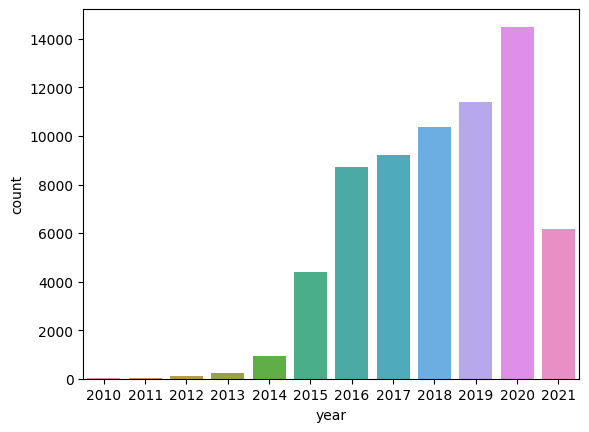

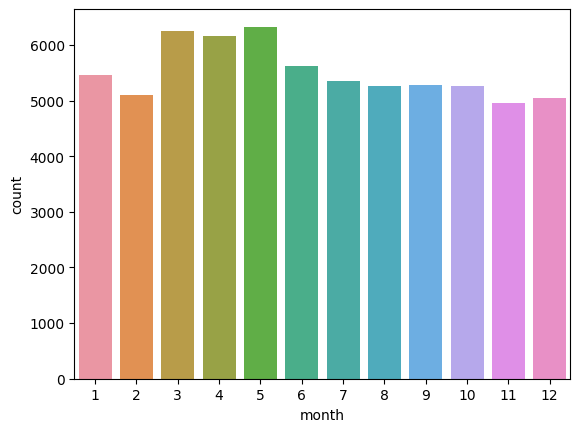

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ='year', data = df) 
plt.show()
df['month'] = pd.DatetimeIndex(df['date']).month
sns.countplot(x ='month', data = df) 
plt.show()

#Hashtag Analysis

## WordCloud for hashtags

In [ ]:
import re

def clean_text(text):
    # Remove special characters, @ symbols, and hashtags
    text = re.sub(r'[^a-zA-Z0-9\s@#]', ' ', text)
    text = re.sub(r'@', ' ', text)
    text = re.sub(r'#', ' ', text)
    text = re.sub(r"[\[\]']", "", text)
    
    # Remove multiple whitespaces
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Apply cleaning to the 'tweets' column
df['hashtags'] = df['hashtags'].apply(clean_text)

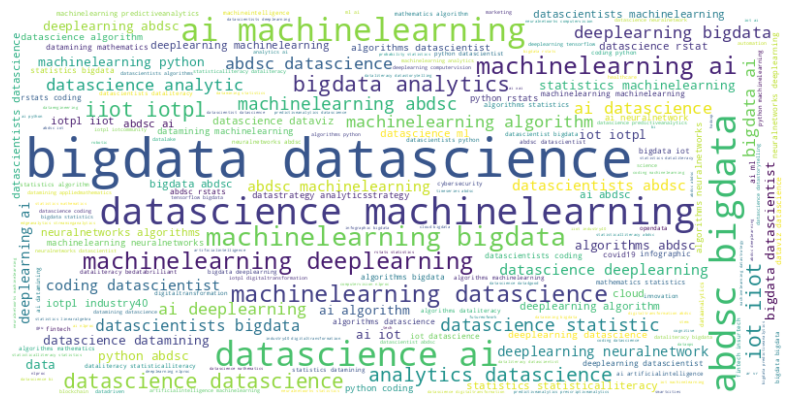

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

hashtags = df['hashtags'].explode().dropna().tolist()

# Convert the list of hashtags into a space-separated string
hashtags_text = ' '.join(hashtags)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Hashtags Bag of Words


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Creating a df containing only tweets with hashtags
only_hashtags_df = df[df['hashtags'].apply(lambda x: len(x) > 0)]

In [ ]:
only_hashtags_df

id      conversation_id        date    user_id  \
9       1406334476905500679  1406334476905500679  2021-06-20  534563976   
10      1406333930551324673  1406333930551324673  2021-06-20  534563976   
27      1406320816028098561  1406320816028098561  2021-06-20  534563976   
33      1406318914846576648  1406318914846576648  2021-06-20  534563976   
38      1406303263775879170  1406303263775879170  2021-06-19  534563976   
...                     ...                  ...         ...        ...   
240671    26040877877035008    26040877877035008  2011-01-15    9207632   
240806     2933205946597376     2933205946597376  2010-11-12    2384071   
241013          20135575439          20135575439  2010-08-02   14984090   
241024          19793654719          19793654719  2010-07-29     113963   
241137          15414225559          15414225559  2010-06-04   14984090   

                  name                                              tweet  \
9           Kirk Borne  Demystifying #AI with 10 top applications:  ht...   
10          Kirk Borne  Trends in #AI for next 5 years, including reve...   
27          Kirk Borne  #ApacheSpark Basics in 7 10-minute tutorials: ...   
33          Kirk Borne  Resources for #Forecasting #PredictiveAnalytic...   
38          Kirk Borne  .@SASsoftware advances the artificial intellig...   
...                ...                                                ...   
240671    Maria Popova  The science of the hashtag – the Twitter data ...   
240806      timoreilly  Top 3 In a Nutshell books in recent @oreillyme...   
241013  O'Reilly Radar  Big data's emerging LAMP stack equivalent.  ht...   
241024   Werner Vogels  Jim Gray will forever be linked to defining th...   
241137  O'Reilly Radar  A data visualization primer: @ben_fry on why v...   

       language  year  replies_count  likes_count  retweets_count  \
9            en  2021              0           12              10   
10           en  2021              1           32              19   
27           en  2021              0           28              17   
33           en  2021              0           12               7   
38           en  2021              0           16              17   
...         ...   ...            ...          ...             ...   
240671       en  2011              0           20              13   
240806       en  2010              0           28              15   
241013       en  2010              0           13              11   
241024       en  2010              0           11              11   
241137       en  2010              0           14               3   

                                                 hashtags  \
9       ai bigdata datascience daife datamining machin...   
10      ai infographic bigdata datascience machinelear...   
27      apachespark abdsc bigdata datascience ai machi...   
33      forecasting predictiveanalytics predictivemode...   
38      sasvisionary sasgf ai edge edgeai industry40 i...   
...                                                   ...   
240671                                lessambitiousmovies   
240806                                   ebook strataconf   
241013                                   data datascience   
241024                                             kindle   
241137                                        datascience   

                                           cleaned_tweets  month  
9       Demystifying AI with 10 top applications BigDa...      6  
10      Trends in AI for next 5 years including revenu...      6  
27      ApacheSpark Basics in 7 10 minute tutorials ab...      6  
33      Resources for Forecasting PredictiveAnalytics ...      6  
38      SASsoftware advances the artificial intelligen...      6  
...                                                   ...    ...  
240671  The science of the hashtag the Twitter data ca...      1  
240806  Top 3 In a Nutshell books in recent oreillymed...     11  
241013  Big data s emerging LAMP s

In [ ]:
# Tokenizing the tweets
hashtags_lists = only_hashtags_df['hashtags']
hashtags_flat = [hashtag for hashtag in hashtags_lists]

tokenized_tweets = [word_tokenize(tweet) for tweet in hashtags_flat]

stop_words = set(stopwords.words('english'))

# Removing stopwords and punctuation from the tokenized tweets
filtered_tweets = []
for tweet_tokens in tokenized_tweets:
    filtered_tokens = [token.lower() for token in tweet_tokens if token.lower() not in stop_words and token.isalpha()]
    filtered_tweets.append(filtered_tokens)

# Concatenating all the filtered tweet tokens into a single list
all_tokens = [token for tweet_tokens in filtered_tweets for token in tweet_tokens]

# Calculating the frequency distribution of the tokens
fdist = FreqDist(all_tokens)

# Getting the most common words as the bag of words
bag_of_words = fdist.most_common()

bag_of_words

[('datascience', 41900),
 ('bigdata', 32131),
 ('machinelearning', 25823),
 ('ai', 19209),
 ('abdsc', 13371),
 ('deeplearning', 8250),
 ('datascientists', 6895),
 ('iot', 5998),
 ('algorithms', 5368),
 ('statistics', 5229),
 ('analytics', 4987),
 ('python', 4420),
 ('iiot', 3281),
 ('neuralnetworks', 3250),
 ('datamining', 2889),
 ('iotpl', 2881),
 ('dataliteracy', 2797),
 ('coding', 2657),
 ('predictiveanalytics', 2602),
 ('rstats', 2335),
 ('digitaltransformation', 2275),
 ('mathematics', 2003),
 ('dataviz', 1628),
 ('ml', 1496),
 ('nlproc', 1345),
 ('statisticalliteracy', 1260),
 ('edgeanalytics', 1237),
 ('fintech', 1195),
 ('cx', 1164),
 ('data', 1129),
 ('datascientist', 1056),
 ('computervision', 1044),
 ('tensorflow', 866),
 ('martech', 857),
 ('science', 844),
 ('datastrategy', 839),
 ('analyticsstrategy', 823),
 ('edgecomputing', 808),
 ('datastorytelling', 790),
 ('cloud', 780),
 ('artificialintelligence', 734),
 ('streaminganalytics', 626),
 ('timeseries', 600),
 ('bedatabr

### WordCloud for Hashtags Bag of Words

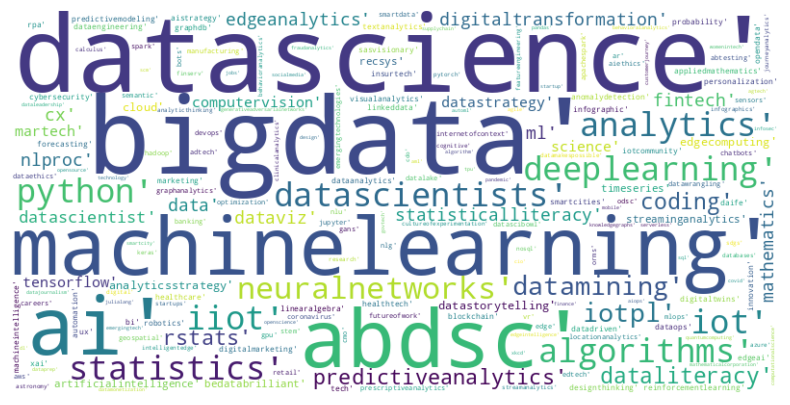

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

bag_of_words = [str(word) for word in bag_of_words]

# Convert list to string
text = ' '.join(bag_of_words)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Topic Models (Using LDA algorithm)

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from tabulate import tabulate
from nltk.corpus import stopwords

# Load the stop words
stop_words = set(stopwords.words('english'))

# Create a list of tokenized documents, removing stop words
tokenized_docs = only_hashtags_df['hashtags'].apply(lambda x: [word for word in x.split() if word.lower() not in stop_words])

# Create a dictionary of the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

# Create a corpus of the tokenized documents
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Create a Gensim LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)

# Get the top words and scores for each topic
topics = lda_model.show_topics(num_topics=-1, num_words=10, formatted=False)

# Extract the top words and scores for each topic
topic_words_scores = []
for topic in topics:
    topic_num = topic[0]
    topic_words = [word_score[0] for word_score in topic[1]]
    topic_scores = [word_score[1] for word_score in topic[1]]
    topic_words_scores.append((topic_num, topic_words, topic_scores))

# Create a table to display the topic words and scores
table = []
for topic in topic_words_scores:
    topic_num = topic[0]
    topic_words = topic[1]
    topic_scores = topic[2]
    table.extend([[f"Topic {topic_num}"] + list(row) for row in zip(topic_words, topic_scores)])

# Print the table
print(tabulate(table, headers=["Topic", "Word", "Score"], tablefmt="grid"))

+---------+-----------------+------------+
| Topic   | Word            |      Score |
+=========+=================+============+
| Topic 0 | datascience     | 0.155973   |
+---------+-----------------+------------+
| Topic 0 | iot             | 0.135601   |
+---------+-----------------+------------+
| Topic 0 | bigdata         | 0.109646   |
+---------+-----------------+------------+
| Topic 0 | machinelearning | 0.035775   |
+---------+-----------------+------------+
| Topic 0 | ai              | 0.0336964  |
+---------+-----------------+------------+
| Topic 0 | udacity         | 0.0278372  |
+---------+-----------------+------------+
| Topic 0 | smartcities     | 0.0194265  |
+---------+-----------------+------------+
| Topic 0 | edgeanalytics   | 0.0170254  |
+---------+-----------------+------------+
| Topic 0 | iiot            | 0.0134842  |
+---------+-----------------+------------+
| Topic 0 | nosql           | 0.00820876 |
+---------+-----------------+------------+
| Topic 1 |

### Topic Models Charts

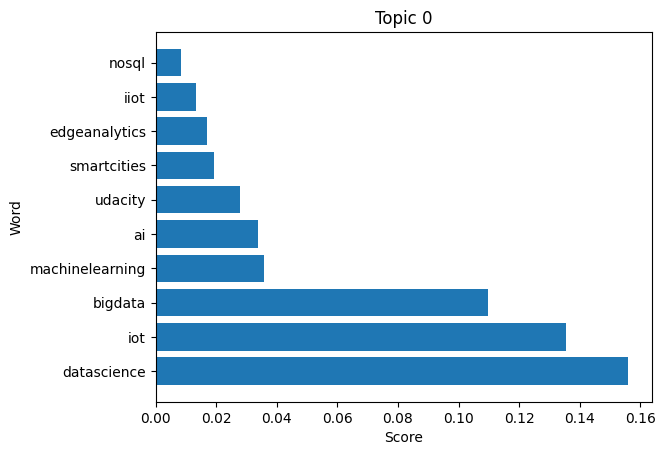

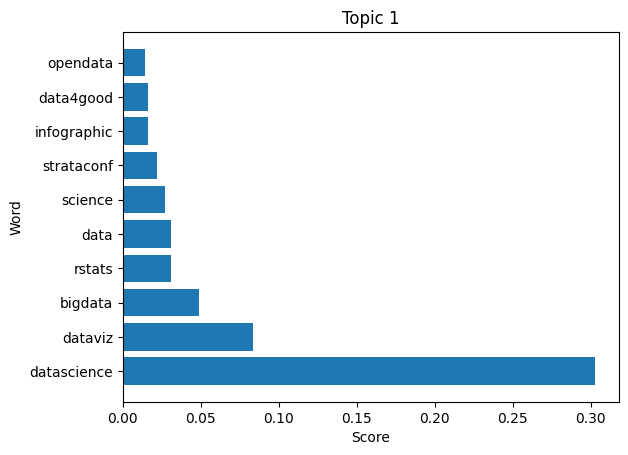

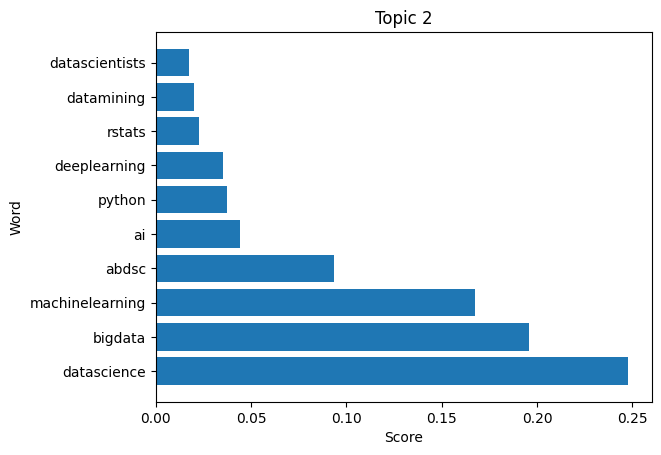

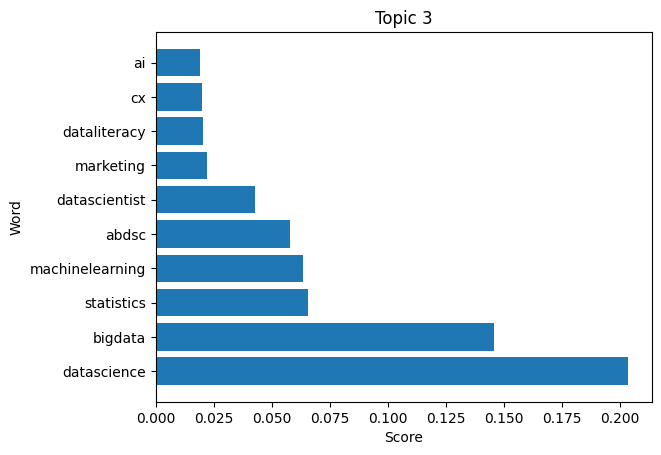

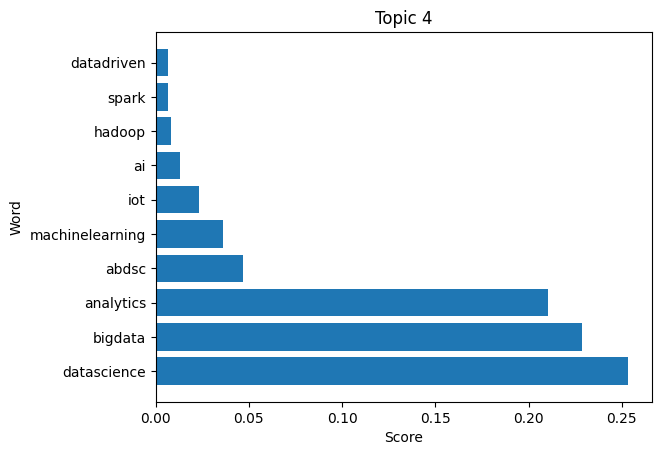

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from tabulate import tabulate
import matplotlib.pyplot as plt

# Create a table to display the topic words and scores
table = []
for topic in topic_words_scores:
    topic_num = topic[0]
    topic_words = topic[1]
    topic_scores = topic[2]
    table.extend([[f"Topic {topic_num}"] + list(row) for row in zip(topic_words, topic_scores)])

# Create a DataFrame from the table
df = pd.DataFrame(table, columns=["Topic", "Word", "Score"])

# Plot the chart
for topic_num in df['Topic'].unique():
    topic_df = df[df['Topic'] == topic_num]
    plt.figure()
    plt.barh(topic_df['Word'], topic_df['Score'])
    plt.xlabel('Score')
    plt.ylabel('Word')
    plt.title(f'{topic_num}')
    plt.show()


## Named-Entity Recognition

In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define a function to perform NER on a text
def perform_ner(text):
    doc = nlp(text)
    entities = []
    for entity in doc.ents:
        entities.append((entity.text, entity.label_))
    return entities

# Apply NER on each document in the DataFrame
only_hashtags_df['ner'] = only_hashtags_df['hashtags'].apply(perform_ner)

<ipython-input-21-4259c28d322f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_hashtags_df['ner'] = only_hashtags_df['hashtags'].apply(perform_ner)


In [ ]:
# Create a new df containing only rows with NER
ner_df = only_hashtags_df[only_hashtags_df['ner'].apply(lambda x: len(x) > 0)]
ner_df

id      conversation_id        date    user_id  \
38      1406303263775879170  1406303263775879170  2021-06-19  534563976   
77      1406109705986969604  1406109705986969604  2021-06-19  328415084   
93      1406051613425479681  1406051613425479681  2021-06-19   73830691   
193     1405863389499432960  1405863389499432960  2021-06-18  534563976   
220     1405857455641403395  1405857455641403395  2021-06-18  534563976   
...                     ...                  ...         ...        ...   
236322   258224539442479106   258224539442479106  2012-10-16  537555179   
236945   238030305024438274   238030305024438274  2012-08-22   11086372   
237835   207650366601428993   207650366601428993  2012-05-30   47487925   
239893   106414171683434496   106414171683434496  2011-08-24    2384071   
240421    50850175937290240    50850175937290240  2011-03-24        989   

                        name  \
38                Kirk Borne   
77      Techfest, IIT Bombay   
93                 AeroFarms   
193               Kirk Borne   
220               Kirk Borne   
...                      ...   
236322       Sunita Williams   
236945      Karim R. Lakhani   
237835     VMware Tanzu Data   
239893            timoreilly   
240421                    OM   

                                                    tweet language  year  \
38      .@SASsoftware advances the artificial intellig...       en  2021   
77      #Data has shown that the Whakaari volcano had ...       en  2021   
93      At @AeroFarms, #horticulture intersects with #...       en  2021   
193     #Gartner's Emerging Technology and Trends Impa...       en  2021   
220     Choosing the Right #AI approach for your busin...       en  2021   
...                                                   ...      ...   ...   
236322  #Dragon delivered science capability to #ISS l...       en  2012   
236945  A data scientist becomes dean at Harvard's Gra...       en  2012   
237835  Data Science Summit Videos are working and can...       en  2012   
239893  GNS Healthcare: fascinating company applying d...       en  2011   
240421  Facebook scraper, Pete Warden launches Data Sc...       en  2011   

        replies_count  likes_count  retweets_count  \
38                  0           16              17   
77                  0           20              12   
93                  1           17               4   
193                 0           16              17   
220                 0           24              13   
...               ...          ...             ...   
236322             16           48              45   
236945              2           20              49   
237835              0           11               8   
239893              1           15               4   
240421              0           13               6   

                                                 hashtags  \
38      sasvisionary sasgf ai edge edgeai industry40 i...   
77       data satellite computer scientists science earth   
93      horticulture genetics foodsafety datascience n...   
193     gartner iot iiot iotpl iotcommunity digitaltra...   
220     ai processmining rpa automation iot iiot iotpl...   
...                                                   ...   
236322                                         dragon iss   
236945                                    bigdata harvard   
237835                                         bigdatasci   
239893                                         healthcare   
240421                                        bigdataconf   

                                           cleaned_tweets  month  \
38      SASsoftware advances the artificial intelligen...      6   
77      Data has shown that the Whakaari volcano had r...      6   
93      At AeroFarms horticulture intersects with gene...      6   
193     Gartner s Emerging Technology and Trends Impac...      6   
220     Choosing the Right AI approach for your busine...      6   
...                                 

In [ ]:
ner_df['ner']

38                                     [(industry40, NORP)]
77                                           [(earth, LOC)]
93        [(horticulture genetics foodsafety datascience...
193       [(gartner iot iiot, ORG), (industry40, NORP), ...
220                                    [(industry40, NORP)]
                                ...                        
236322                               [(dragon iss, PERSON)]
236945                                     [(harvard, ORG)]
237835                                  [(bigdatasci, ORG)]
239893                                  [(healthcare, ORG)]
240421                                 [(bigdataconf, ORG)]
Name: ner, Length: 8664, dtype: object

### WordCloud for NER

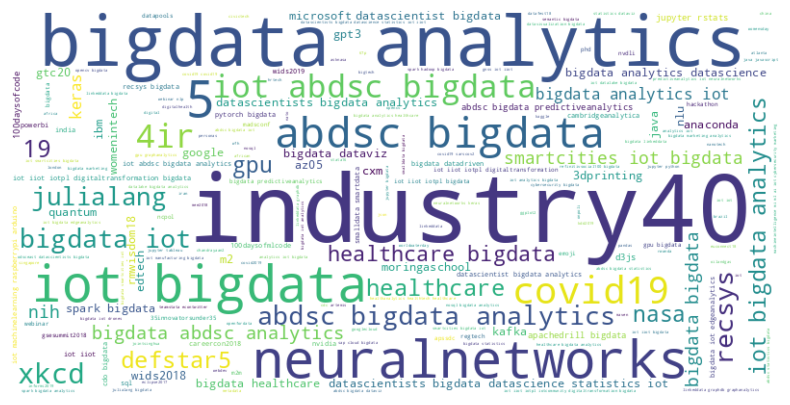

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the named entities and their labels from the 'ner' column
named_entities = [entity for row in ner_df['ner'] for entity in row]

# Create a dictionary to store the frequency of each named entity
entity_frequencies = {}
for entity, label in named_entities:
    entity_frequencies[entity] = entity_frequencies.get(entity, 0) + 1

# Create a WordCloud object using the entity frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(entity_frequencies)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Bar chart for NER labels

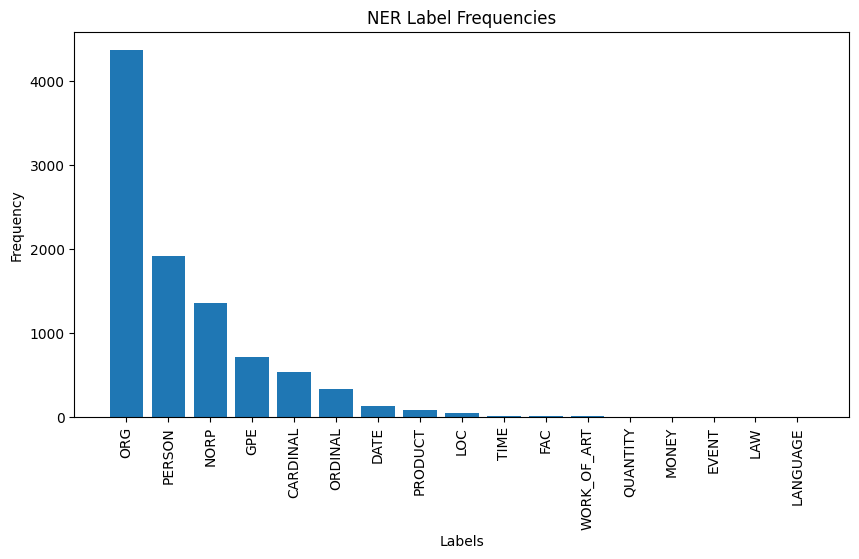

In [ ]:
import matplotlib.pyplot as plt

# Extract the labels from the 'ner' column in the ner_df DataFrame
labels = [label for item in ner_df['ner'] for _, label in item]

# Create a dictionary to store the frequency of each label
label_frequencies = {}
for label in labels:
    label_frequencies[label] = label_frequencies.get(label, 0) + 1

# Sort the labels and frequencies in descending order
sorted_labels = sorted(label_frequencies, key=label_frequencies.get, reverse=True)
sorted_frequencies = [label_frequencies[label] for label in sorted_labels]

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(sorted_labels, sorted_frequencies)

# Set labels and title
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('NER Label Frequencies')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Display the bar chart
plt.show()


# Tweets Analysis

In [ ]:
import pandas as pd

df = pd.read_csv("/content/datasets/data-science-tweets/tweets/data_science.csv")
df.head()

<ipython-input-26-c8375d26d3f6>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/datasets/data-science-tweets/tweets/data_science.csv")


id      conversation_id               created_at  \
0  1406400408545804288  1406400396264943616  2021-06-20 05:26:01 IST   
1  1406390341176016897  1406390341176016897  2021-06-20 04:46:01 IST   
2  1406386311481774083  1406386311481774083  2021-06-20 04:30:00 IST   
3  1406383545153638402  1406383545153638402  2021-06-20 04:19:01 IST   
4  1406358632648818689  1406358632648818689  2021-06-20 02:40:01 IST   

         date      time  timezone              user_id         username  \
0  2021-06-20  05:26:01       530  1113747629282930688  ballouxfrancois   
1  2021-06-20  04:46:01       530   788898706586275840     tdatascience   
2  2021-06-20  04:30:00       530             19402238      sciencenews   
3  2021-06-20  04:19:01       530   788898706586275840     tdatascience   
4  2021-06-20  02:40:01       530   788898706586275840     tdatascience   

                    name place  ... geo source user_rt_id user_rt retweet_id  \
0  Prof Francois Balloux   NaN  ... NaN    NaN        NaN     NaN        NaN   
1   Towards Data Science   NaN  ... NaN    NaN        NaN     NaN        NaN   
2           Science News   NaN  ... NaN    NaN        NaN     NaN        NaN   
3   Towards Data Science   NaN  ... NaN    NaN        NaN     NaN        NaN   
4   Towards Data Science   NaN  ... NaN    NaN        NaN     NaN        NaN   

   reply_to  retweet_date  translate trans_src trans_dest  
0        []           NaN        NaN       NaN        NaN  
1        []           NaN        NaN       NaN        NaN  
2        []           NaN        NaN       NaN        NaN  
3        []           NaN        NaN       NaN        NaN  
4        []           NaN        NaN       NaN        NaN  

[5 rows x 36 columns]

In [ ]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    
    # Remove special characters, @ symbols, and hashtags
    text = re.sub(r'[^a-zA-Z0-9\s@#]', ' ', text)
    text = re.sub(r'@', ' ', text)
    text = re.sub(r'#', ' ', text)
    
    # Remove multiple whitespaces
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Apply cleaning to the 'tweets' column
df['cleaned_tweets'] = df['tweet'].apply(clean_text)

##Tweets Sentiments

In [ ]:
from textblob import TextBlob

# Function to classify sentiment using TextBlob and return sentiment score
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, polarity

# Apply sentiment classification and get sentiment score
df[['sentiment', 'sentiment_score']] = df['cleaned_tweets'].apply(get_sentiment).apply(pd.Series)

In [ ]:
# Display the updated DataFrame
df[['cleaned_tweets', 'sentiment', 'sentiment_score']]

cleaned_tweets sentiment  \
0       What can be done Never blindly trust an abstra...  Positive   
1       We need a paradigm shift from model centric to...   Neutral   
2       Using high resolution satellite data and compu...  Negative   
3       Stephenson Data shares four steps that will he...  Positive   
4       Curricula is inherently brittle in a world whe...  Positive   
...                                                   ...       ...   
241381  Cda jobs data Dec employment rose in health so...  Positive   
241382  RT filiber Have a Computer Science background ...  Positive   
241383  pop17 Heck with science I ve got empirical dat...  Positive   
241384  All in the data RT noahWG Dr Petra provides pe...  Negative   
241385  The world of retail will always be a mix of ar...   Neutral   

        sentiment_score  
0              0.026190  
1              0.000000  
2             -0.086667  
3              0.234848  
4              0.100000  
...                 ...  
241381         0.211111  
241382         0.138095  
241383         0.100000  
241384        -0.200000  
241385         0.000000  

[241386 rows x 3 columns]

###Visualising the sentiments

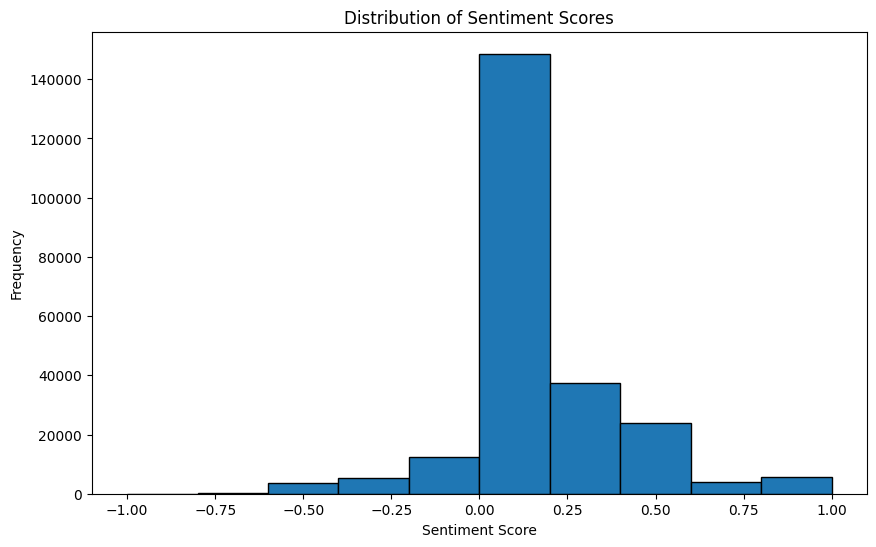

In [ ]:
import matplotlib.pyplot as plt

# Extract the 'sentiment_score' column from the DataFrame
sentiment_scores = df['sentiment_score']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores, bins=10, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')

# Display the histogram
plt.show()


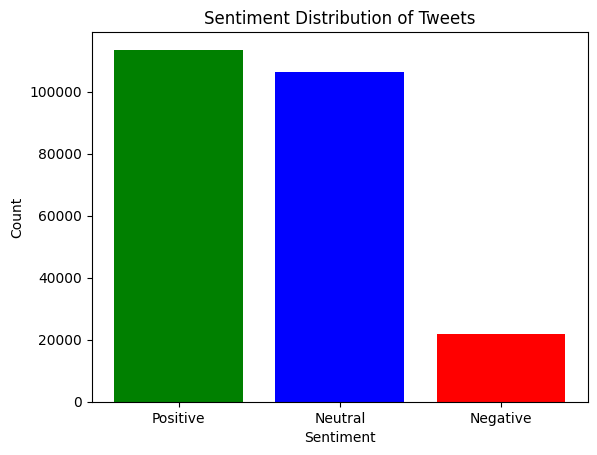

In [ ]:
import matplotlib.pyplot as plt

# Count the number of tweets for each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Define colors for the bars
colors = ['green', 'blue', 'red']

# Create a bar plot of sentiment distribution with colorful bars
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Tweets')
plt.show()


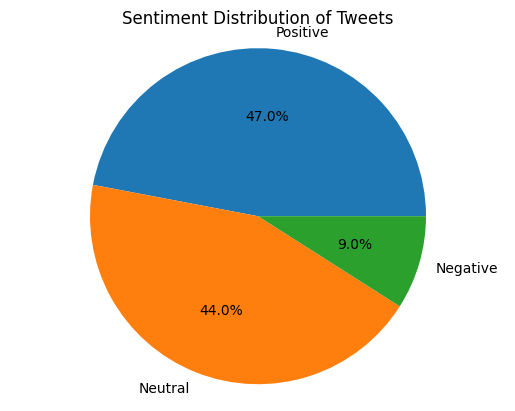

In [ ]:
import matplotlib.pyplot as plt

# Count the number of tweets for each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart of sentiment distribution
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution of Tweets')
plt.axis('equal')
plt.show()

###WordCloud of positive tweets

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

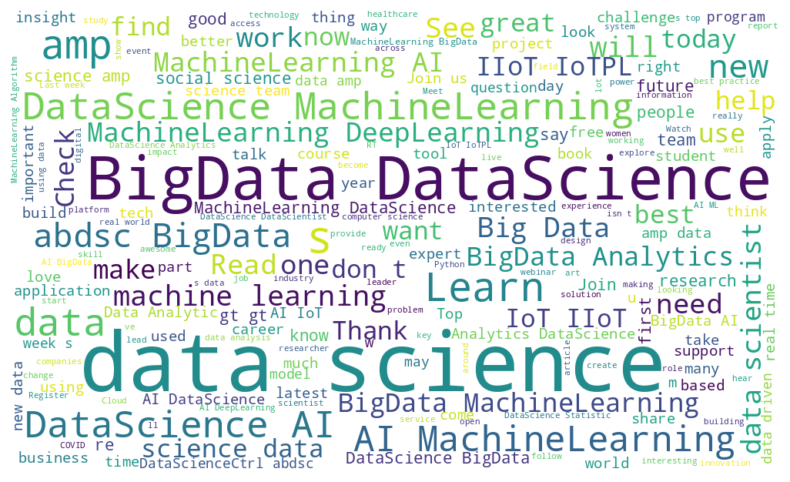

In [ ]:
positive_tweets = df[df['sentiment'] == 'Positive']

# Concatenate all positive tweets into a single string
positive_tweets_text = ' '.join(positive_tweets['cleaned_tweets'])
# Create a word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(positive_tweets_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Most common words of positive tweets df

In [ ]:
from collections import Counter

# Concatenate all cleaned tweets into a single string
all_tweets = ' '.join(positive_tweets['cleaned_tweets'])

# Split the string into individual words
words = all_tweets.split()

# Count the occurrence of each word
word_counts = Counter(words)

# Get the most common words and their counts
most_common_words = word_counts.most_common(10)

# Create a DataFrame from the most common words
df_most_common_words = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Print the DataFrame
print(df_most_common_words)


          Word  Count
0          the  71178
1           to  66266
2          and  59076
3         data  55858
4           of  47244
5  DataScience  43854
6           in  42672
7      science  40216
8          for  35600
9            a  34079


###WordCloud of negative tweets

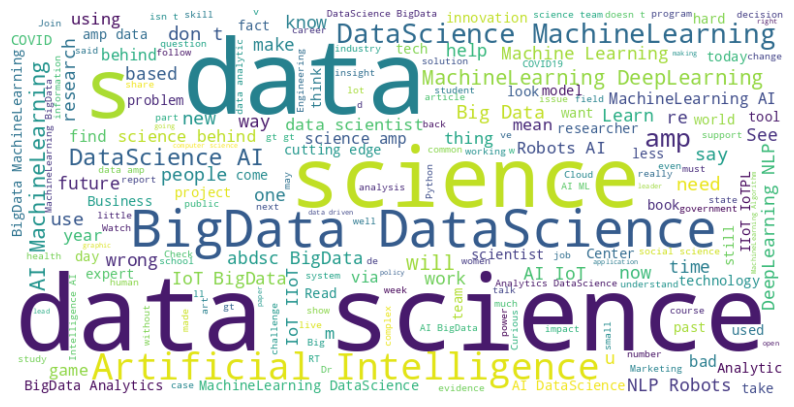

In [ ]:
negative_tweets = df[df['sentiment'] == 'Negative']

# Concatenate all negative tweets into a single string
negative_tweets_text = ' '.join(negative_tweets['cleaned_tweets'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Most common words in negative tweets df

In [ ]:
from collections import Counter
import pandas as pd

# Assuming you have a DataFrame named 'positive_tweets' with a 'cleaned_tweets' column

# Concatenate all cleaned tweets into a single string
all_tweets = ' '.join(negative_tweets['cleaned_tweets'])

# Split the string into individual words
words = all_tweets.split()

# Count the occurrence of each word
word_counts = Counter(words)

# Get the most common words and their counts
most_common_words = word_counts.most_common(10)

# Create a DataFrame from the most common words
df_most_common_words = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Print the DataFrame
print(df_most_common_words)


          Word  Count
0          the  14541
1         data  12049
2           to  11915
3          and  11153
4           of   9553
5      science   9330
6  DataScience   7341
7           in   7248
8            a   6727
9           is   5971


### WordCloud of neutral tweets

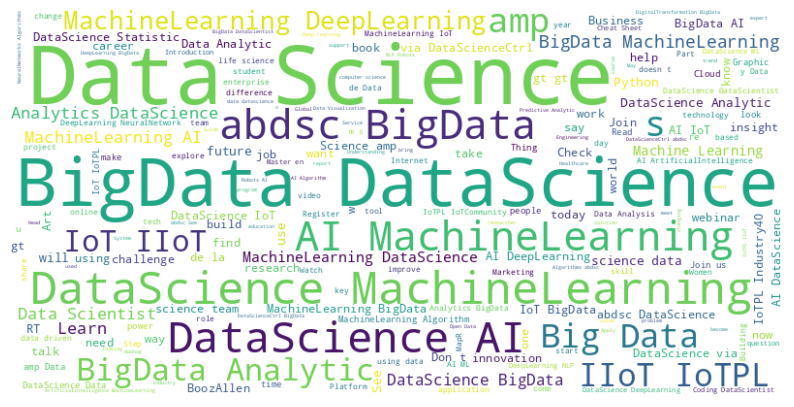

In [ ]:
neutral_tweets = df[df['sentiment'] == 'Neutral']

# Concatenate all negative tweets into a single string
neutral_tweets_text = ' '.join(neutral_tweets['cleaned_tweets'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_tweets_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Most common in neautral tweets df

In [ ]:
from collections import Counter

# Concatenate all cleaned tweets into a single string
all_tweets = ' '.join(neutral_tweets['cleaned_tweets'])

# Split the string into individual words
words = all_tweets.split()

# Count the occurrence of each word
word_counts = Counter(words)

# Get the most common words and their counts
most_common_words = word_counts.most_common(10)

# Create a DataFrame from the most common words
df_most_common_words = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Print the DataFrame
print(df_most_common_words)


              Word  Count
0      DataScience  53464
1          BigData  39096
2              the  36359
3               to  33876
4             data  32329
5              and  31646
6             Data  31622
7               of  28350
8  MachineLearning  26993
9               AI  24624


## Bag of Words

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Tokenizing the tweets
tokenized_tweets = [word_tokenize(tweet) for tweet in df['cleaned_tweets']]

stop_words = set(stopwords.words('english'))

# Removing stopwords and punctuation from the tokenized tweets
filtered_tweets = []
for tweet_tokens in tokenized_tweets:
    filtered_tokens = [token.lower() for token in tweet_tokens if token.lower() not in stop_words and token.isalpha()]
    filtered_tweets.append(filtered_tokens)

# Concatenating all the filtered tweet tokens into a single list
all_tokens = [token for tweet_tokens in filtered_tweets for token in tweet_tokens]

# Calculating the frequency distribution of the tokens
fdist = FreqDist(all_tokens)

In [ ]:
# Getting the most common words as the bag of words
bag_of_words = fdist.most_common()
bag_of_words

[('data', 165059),
 ('datascience', 131809),
 ('science', 121085),
 ('bigdata', 80910),
 ('machinelearning', 58127),
 ('ai', 56565),
 ('amp', 32722),
 ('analytics', 27999),
 ('abdsc', 22938),
 ('iot', 20830),
 ('deeplearning', 17451),
 ('via', 17206),
 ('new', 15772),
 ('gt', 12387),
 ('datascientists', 12257),
 ('learn', 11411),
 ('big', 10659),
 ('iiot', 10575),
 ('learning', 10394),
 ('algorithms', 9294),
 ('statistics', 9102),
 ('see', 9068),
 ('iotpl', 9030),
 ('python', 9007),
 ('de', 8372),
 ('business', 8019),
 ('using', 7845),
 ('digitaltransformation', 7780),
 ('get', 7678),
 ('research', 7613),
 ('use', 7215),
 ('us', 7070),
 ('ml', 6793),
 ('top', 6634),
 ('machine', 6393),
 ('join', 6386),
 ('one', 6072),
 ('tech', 5989),
 ('team', 5968),
 ('need', 5894),
 ('predictiveanalytics', 5877),
 ('today', 5821),
 ('free', 5774),
 ('help', 5773),
 ('world', 5751),
 ('open', 5690),
 ('time', 5663),
 ('intelligence', 5555),
 ('r', 5408),
 ('like', 5299),
 ('datasciencectrl', 5261),
 

### Bag of Words WordCloud

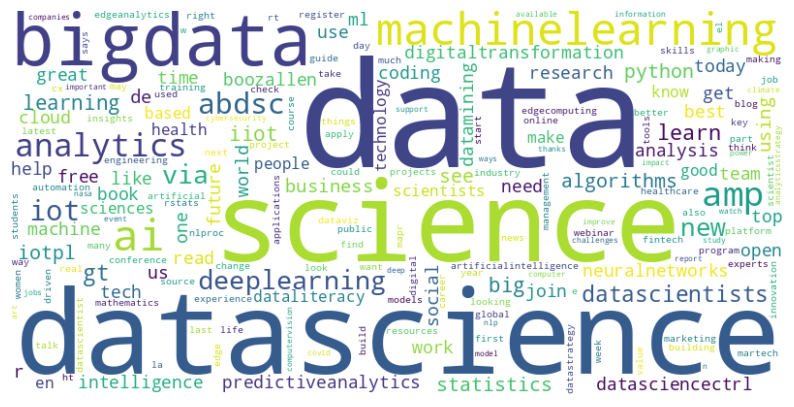

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(bag_of_words))

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##N-grams

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Get the list of stopwords
stopwords_list = stopwords.words('english')

# Tokenize the 'cleaned_tweets' column into words
words = df['cleaned_tweets'].apply(word_tokenize).explode().tolist()

# Remove stopwords from the list of words
words = [word for word in words if word.lower() not in stopwords_list]

words[:50]

['done',
 'Never',
 'blindly',
 'trust',
 'abstract',
 'press',
 'release',
 'secondary',
 'source',
 'Try',
 'inspect',
 'actual',
 'data',
 'figures',
 'Accept',
 'may',
 'well',
 'nonsense',
 'even',
 'findings',
 'extraordinary',
 'sound',
 'science',
 'often',
 'boring',
 '8',
 'need',
 'paradigm',
 'shift',
 'model',
 'centric',
 'data',
 'centric',
 'ML',
 'development',
 'Tobias',
 'Schaffrath',
 'Rosario',
 'shares',
 'reasons',
 'many',
 'applied',
 'ML',
 'projects',
 'fail',
 'proposes',
 'solution',
 'Using',
 'high',
 'resolution']

In [ ]:
# 1-gram
unigrams_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:10]

# 2-gram
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

# 3-gram
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

# N-grams Visualization


Text(0.5, 0, '# of Occurances')

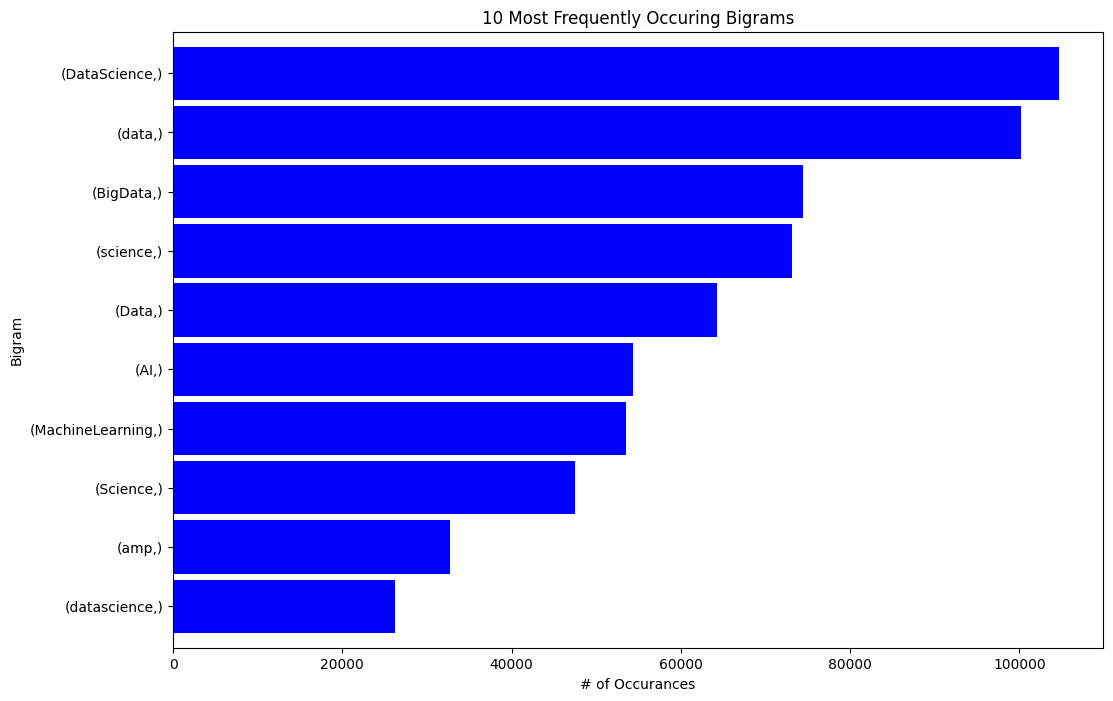

In [ ]:
unigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

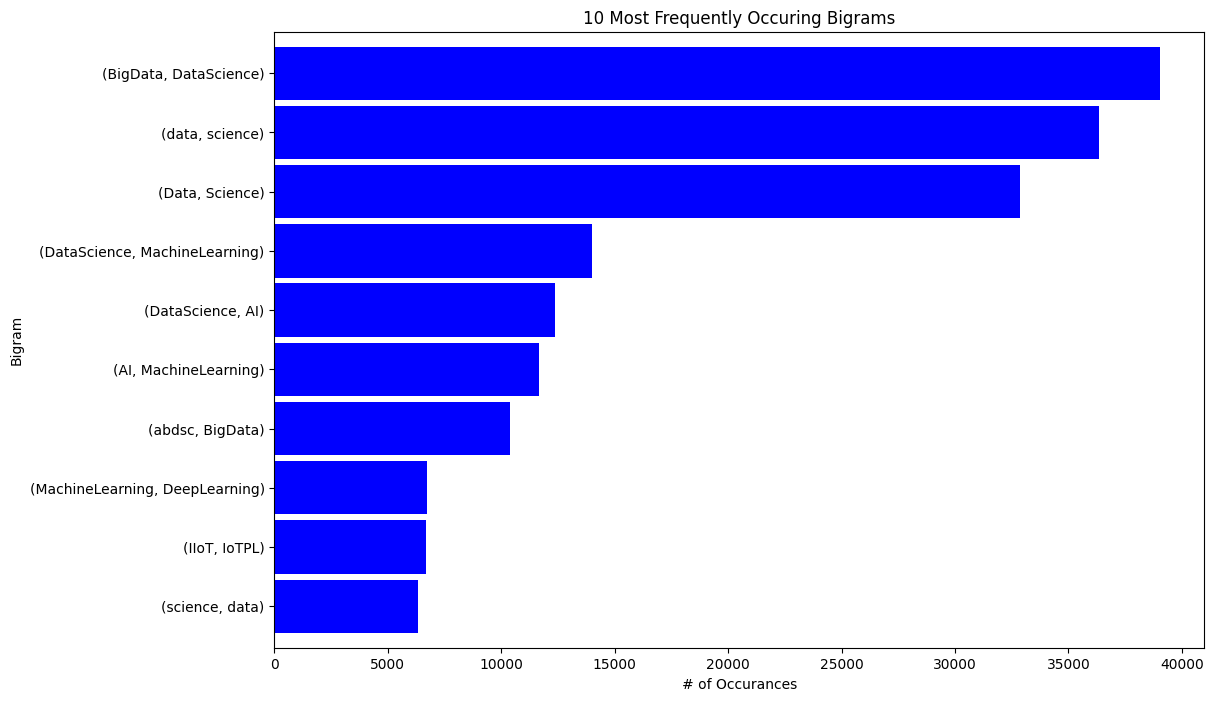

In [ ]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

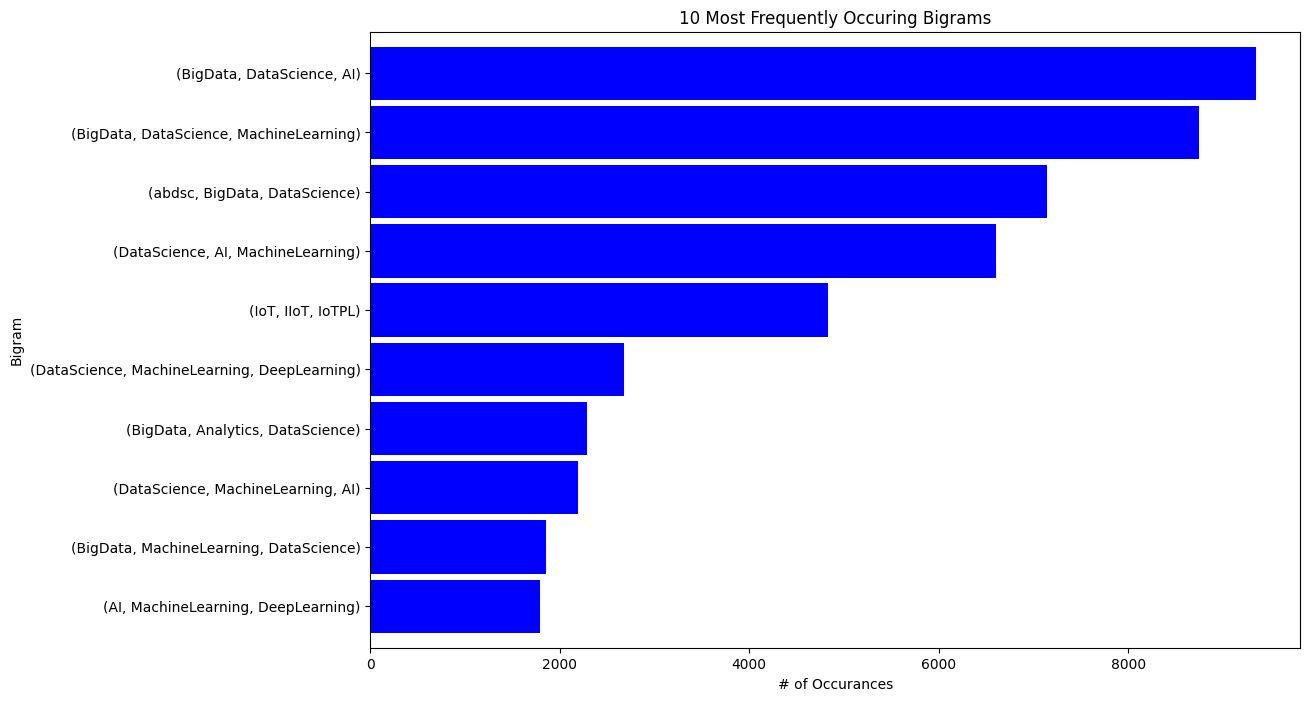

In [ ]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

##TF-IDF

In [ ]:
#filtering more because of too many rows for TF-IDF
#finding the average likes count
average_likes_count = df['likes_count'].mean()

condition = df['likes_count'] >= average_likes_count

filtered_df = df[condition]
filtered_df

id      conversation_id               created_at  \
0       1406400408545804288  1406400396264943616  2021-06-20 05:26:01 IST   
2       1406386311481774083  1406386311481774083  2021-06-20 04:30:00 IST   
10      1406333930551324673  1406333930551324673  2021-06-20 01:01:52 IST   
27      1406320816028098561  1406320816028098561  2021-06-20 00:09:45 IST   
37      1406311453901168640  1406311453901168640  2021-06-19 23:32:33 IST   
...                     ...                  ...                      ...   
240548    38813309901742080    38813309901742080  2011-02-19 09:43:08 IST   
240648    29743860900958208    29743860900958208  2011-01-25 09:04:23 IST   
240806     2933205946597376     2933205946597376  2010-11-12 09:28:25 IST   
241101          16480391385          16480391385  2010-06-18 21:31:10 IST   
241157          15271575408          15271575408  2010-06-03 00:46:45 IST   

              date      time  timezone              user_id         username  \
0       2021-06-20  05:26:01       530  1113747629282930688  ballouxfrancois   
2       2021-06-20  04:30:00       530             19402238      sciencenews   
10      2021-06-20  01:01:52       530            534563976       kirkdborne   
27      2021-06-20  00:09:45       530            534563976       kirkdborne   
37      2021-06-19  23:32:33       530            329972029           edtubb   
...            ...       ...       ...                  ...              ...   
240548  2011-02-19  09:43:08       530              2384071       timoreilly   
240648  2011-01-25  09:04:23       530              5988062     theeconomist   
240806  2010-11-12  09:28:25       530              2384071       timoreilly   
241101  2010-06-18  21:31:10       530              2384071       timoreilly   
241157  2010-06-03  00:46:45       530              2384071       timoreilly   

                         name place  ... user_rt retweet_id reply_to  \
0       Prof Francois Balloux   NaN  ...     NaN        NaN       []   
2                Science News   NaN  ...     NaN        NaN       []   
10                 Kirk Borne   NaN  ...     NaN        NaN       []   
27                 Kirk Borne   NaN  ...     NaN        NaN       []   
37                    Ed Tubb   NaN  ...     NaN        NaN       []   
...                       ...   ...  ...     ...        ...      ...   
240548             timoreilly   NaN  ...     NaN        NaN       []   
240648          The Economist   NaN  ...     NaN        NaN       []   
240806             timoreilly   NaN  ...     NaN        NaN       []   
241101             timoreilly   NaN  ...     NaN        NaN       []   
241157             timoreilly   NaN  ...     NaN        NaN       []   

       retweet_date translate  trans_src  trans_dest  \
0               NaN       NaN        NaN         NaN   
2               NaN       NaN        NaN         NaN   
10              NaN       NaN        NaN         NaN   
27              NaN       NaN        NaN         NaN   
37              NaN       NaN        NaN         NaN   
...             ...       ...        ...         ...   
240548          NaN       NaN        NaN         NaN   
240648          NaN       NaN        NaN         NaN   
240806          NaN       NaN        NaN         NaN   
241101          NaN       NaN        NaN         NaN   
241157          NaN       NaN        NaN         NaN   

                                           cleaned_tweets sentiment  \
0       What can be done Never blindly trust an abstra...  Positive   
2       Using high resolution satellite data and compu...  Negative   
10      Trends in AI for next 5 years including revenu...   Neutral   
27      ApacheSpark Basics in 7 10 minute tutorials ab...   Neutral   
37      The Science Table estimates for Delta spread c...  Positive   
...                                                   ...       ...   
240548  Great job by jakeporway teasing apart themes f...  Positive   
240648  Science in Singapore Real

### TF_IDF WordCloud

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the TfidfVectorizer
tfidf = TfidfVectorizer()

# Calculate the TF-IDF for each row
tfidf_matrix = tfidf.fit_transform(filtered_df['cleaned_tweets'].values)

# Get the feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a list to store the word-score pairs for each row
word_scores = []

# Iterate through each row
for i in range(tfidf_matrix.shape[0]):
    row = tfidf_matrix.getrow(i)
    word_indices = row.indices
    scores = row.data
    row_word_scores = [(feature_names[idx], score) for idx, score in zip(word_indices, scores)]
    word_scores.append(row_word_scores)

# Add a column named 'tf-idf' to the original DataFrame
filtered_df['tf-idf'] = word_scores



<ipython-input-52-3ce5a043736a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['tf-idf'] = word_scores


In [ ]:
# Printing the resulting DataFrame
filtered_df[['cleaned_tweets','tf-idf']]

cleaned_tweets  \
0       What can be done Never blindly trust an abstra...   
2       Using high resolution satellite data and compu...   
10      Trends in AI for next 5 years including revenu...   
27      ApacheSpark Basics in 7 10 minute tutorials ab...   
37      The Science Table estimates for Delta spread c...   
...                                                   ...   
240548  Great job by jakeporway teasing apart themes f...   
240648  Science in Singapore Real time data about a ci...   
240806  Top 3 In a Nutshell books in recent oreillymed...   
241101  RT sarawinge Seminal post on data science from...   
241157  What is data science by mikeloukides is a semi...   

                                                   tf-idf  
0       [(boring, 0.2261855580433615), (often, 0.16484...  
2       [(eruption, 0.30072228968873427), (2019, 0.189...  
10      [(iotcommunity, 0.27120415010903753), (iotpl, ...  
27      [(neo4j, 0.1977402456844254), (computation, 0....  
37      [(threat, 0.1696056923755615), (potential, 0.1...  
...                                                   ...  
240548  [(teasing, 0.37709740348569926), (strataconf, ...  
240648  [(inhabitants, 0.43957326739378916), (authorit...  
240806  [(strataconf, 0.302814658033729), (sale, 0.340...  
241101  [(sarawinge, 0.3977700923054797), (mikeloukide...  
241157  [(grok, 0.4249596881276802), (mikeloukides, 0....  

[25976 rows x 2 columns]

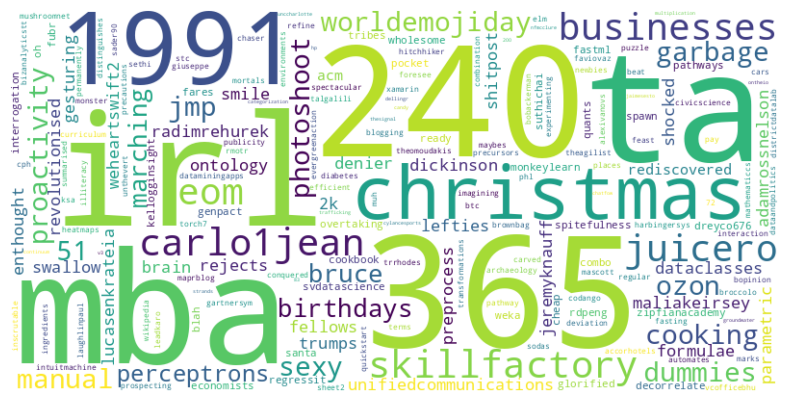

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary of word frequencies from the 'tf-idf' column
word_frequencies = {}
for row in filtered_df['tf-idf']:
    for word, score in row:
        word_frequencies[word] = score

# Sort the word frequencies in ascending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse = True)

# Create a WordCloud object with the lowest frequency words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(sorted_word_frequencies))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
sorted_word_frequencies

[('365', 0.9868955563581996),
 ('irl', 0.9744260381492422),
 ('ta', 0.9744260381492422),
 ('mba', 0.9724105530782413),
 ('240', 0.9724105530782413),
 ('1991', 0.965889750100709),
 ('christmas', 0.9624344236291986),
 ('skillfactory', 0.9080721628053333),
 ('carlo1jean', 0.9041071044107468),
 ('businesses', 0.8795564372493423),
 ('eom', 0.8671758840206965),
 ('juicero', 0.8656776858895383),
 ('worldemojiday', 0.8462176513273026),
 ('cooking', 0.8406150833795267),
 ('dummies', 0.832191169783001),
 ('ozon', 0.8263156990825722),
 ('proactivity', 0.823230068523817),
 ('manual', 0.8192154035147554),
 ('jmp', 0.8144801020983349),
 ('photoshoot', 0.8103693884097168),
 ('garbage', 0.7996455846131449),
 ('sexy', 0.798606064533164),
 ('51', 0.7974058066856468),
 ('birthdays', 0.7968631383092403),
 ('bruce', 0.7890977995484687),
 ('marching', 0.7848877478413051),
 ('perceptrons', 0.7844658255915075),
 ('unifiedcommunications', 0.7734402760274124),
 ('trumps', 0.7725822791746068),
 ('maliakeirsey', 

##Topic Models (using LDA algorithm) 


In [ ]:
import gensim
from gensim import corpora
from tabulate import tabulate
from nltk.corpus import stopwords

# Load the stop words
stop_words = set(stopwords.words('english'))

# Create a list of tokenized documents, removing stop words
tokenized_docs = filtered_df['cleaned_tweets'].apply(lambda x: [word for word in x.split() if word.lower() not in stop_words])

# Create a dictionary of the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

# Create a corpus of the tokenized documents
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Create a Gensim LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)

# Get the top words and scores for each topic
topics = lda_model.show_topics(num_topics=-1, num_words=10, formatted=False)

# Extract the top words and scores for each topic
topic_words_scores = []
for topic in topics:
    topic_num = topic[0]
    topic_words = [word_score[0] for word_score in topic[1]]
    topic_scores = [word_score[1] for word_score in topic[1]]
    topic_words_scores.append((topic_num, topic_words, topic_scores))

# Create a table to display the topic words and scores
table = []
for topic in topic_words_scores:
    topic_num = topic[0]
    topic_words = topic[1]
    topic_scores = topic[2]
    table.extend([[f"Topic {topic_num}"] + list(row) for row in zip(topic_words, topic_scores)])

# Print the table
print(tabulate(table, headers=["Topic", "Word", "Score"], tablefmt="grid"))


+---------+-----------------+------------+
| Topic   | Word            |      Score |
+=========+=================+============+
| Topic 0 | DataScience     | 0.102814   |
+---------+-----------------+------------+
| Topic 0 | BigData         | 0.0866395  |
+---------+-----------------+------------+
| Topic 0 | MachineLearning | 0.0735481  |
+---------+-----------------+------------+
| Topic 0 | abdsc           | 0.053631   |
+---------+-----------------+------------+
| Topic 0 | AI              | 0.0275817  |
+---------+-----------------+------------+
| Topic 0 | DeepLearning    | 0.0223087  |
+---------+-----------------+------------+
| Topic 0 | Python          | 0.0188895  |
+---------+-----------------+------------+
| Topic 0 | Statistics      | 0.0171944  |
+---------+-----------------+------------+
| Topic 0 | R               | 0.0134476  |
+---------+-----------------+------------+
| Topic 0 | Algorithms      | 0.0131465  |
+---------+-----------------+------------+
| Topic 1 |

### Topic Models Charts

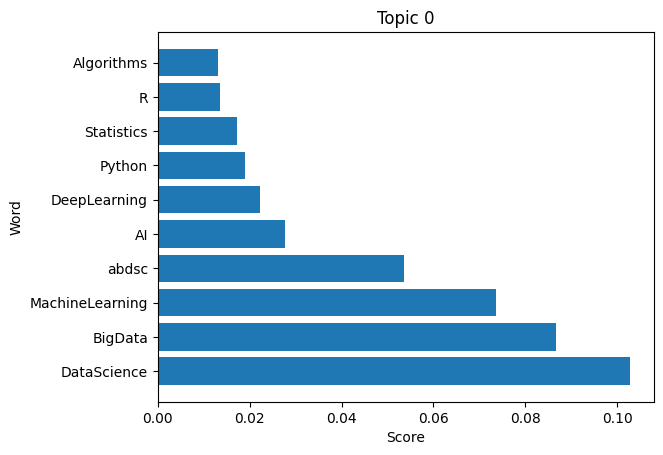

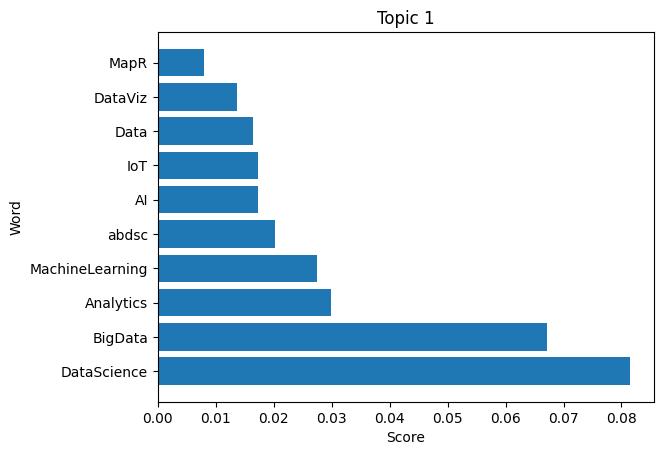

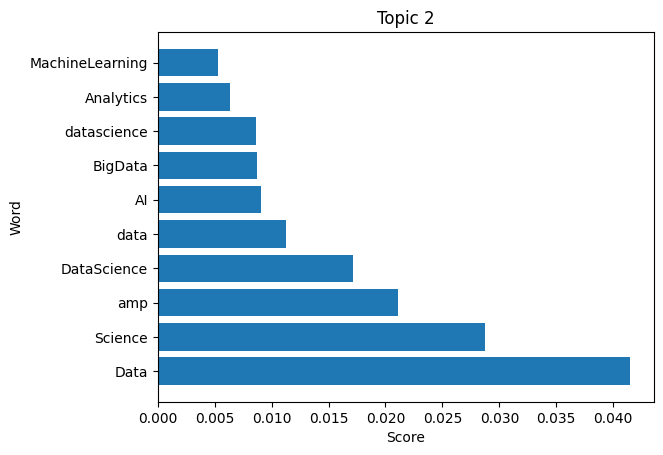

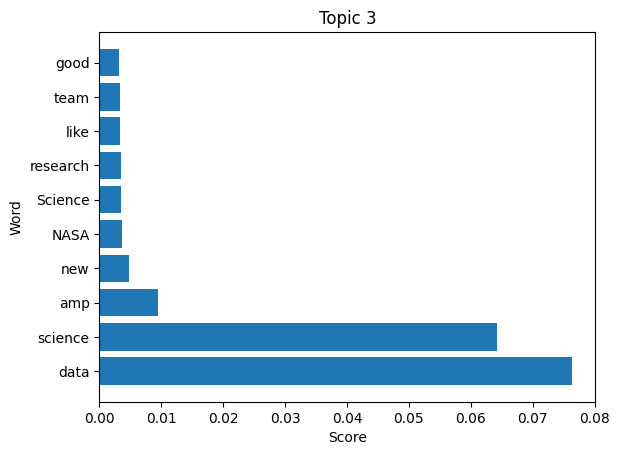

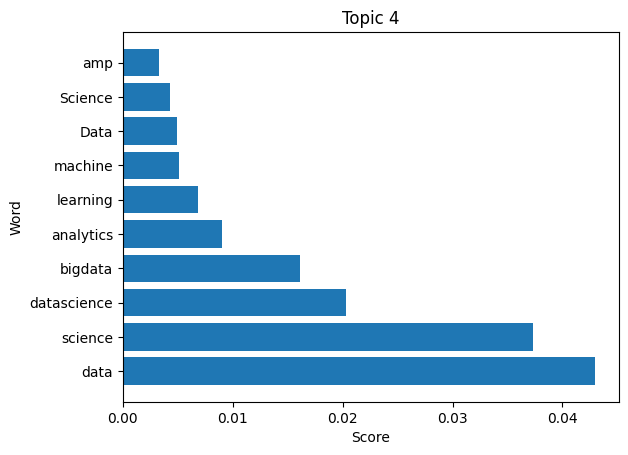

In [ ]:
import gensim
from gensim import corpora
from tabulate import tabulate
import matplotlib.pyplot as plt

# Create a table to display the topic words and scores
table = []
for topic in topic_words_scores:
    topic_num = topic[0]
    topic_words = topic[1]
    topic_scores = topic[2]
    table.extend([[f"Topic {topic_num}"] + list(row) for row in zip(topic_words, topic_scores)])

# Create a DataFrame from the table
df = pd.DataFrame(table, columns=["Topic", "Word", "Score"])

# Plot the chart
for topic_num in df['Topic'].unique():
    topic_df = df[df['Topic'] == topic_num]
    plt.figure()
    plt.barh(topic_df['Word'], topic_df['Score'])
    plt.xlabel('Score')
    plt.ylabel('Word')
    plt.title(f'{topic_num}')
    plt.show()


## Named-Entity Recognition

In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define a function to perform NER on a text
def perform_ner(text):
    doc = nlp(text)
    entities = []
    for entity in doc.ents:
        entities.append((entity.text, entity.label_))
    return entities

# Apply NER on each document in the DataFrame
filtered_df['ner'] = filtered_df['cleaned_tweets'].apply(perform_ner)

In [ ]:
# Create a new df containing only rows with NER
ner_df = filtered_df[filtered_df['ner'].apply(lambda x: len(x) > 0)]
ner_df

id      conversation_id               created_at  \
0       1406400408545804288  1406400396264943616  2021-06-20 05:26:01 IST   
2       1406386311481774083  1406386311481774083  2021-06-20 04:30:00 IST   
10      1406333930551324673  1406333930551324673  2021-06-20 01:01:52 IST   
27      1406320816028098561  1406320816028098561  2021-06-20 00:09:45 IST   
37      1406311453901168640  1406311453901168640  2021-06-19 23:32:33 IST   
...                     ...                  ...                      ...   
240035    95491068010835968    95491068010835968  2011-07-25 19:20:19 IST   
240413    51178199253651456    51178199253651456  2011-03-25 12:36:48 IST   
240429    50760684560068608    50760684560068608  2011-03-24 08:57:44 IST   
240806     2933205946597376     2933205946597376  2010-11-12 09:28:25 IST   
241101          16480391385          16480391385  2010-06-18 21:31:10 IST   

              date      time  timezone              user_id         username  \
0       2021-06-20  05:26:01       530  1113747629282930688  ballouxfrancois   
2       2021-06-20  04:30:00       530             19402238      sciencenews   
10      2021-06-20  01:01:52       530            534563976       kirkdborne   
27      2021-06-20  00:09:45       530            534563976       kirkdborne   
37      2021-06-19  23:32:33       530            329972029           edtubb   
...            ...       ...       ...                  ...              ...   
240035  2011-07-25  19:20:19       530              2384071       timoreilly   
240413  2011-03-25  12:36:48       530              2384071       timoreilly   
240429  2011-03-24  08:57:44       530               765548           hmason   
240806  2010-11-12  09:28:25       530              2384071       timoreilly   
241101  2010-06-18  21:31:10       530              2384071       timoreilly   

                         name place  ... reply_to retweet_date translate  \
0       Prof Francois Balloux   NaN  ...       []          NaN       NaN   
2                Science News   NaN  ...       []          NaN       NaN   
10                 Kirk Borne   NaN  ...       []          NaN       NaN   
27                 Kirk Borne   NaN  ...       []          NaN       NaN   
37                    Ed Tubb   NaN  ...       []          NaN       NaN   
...                       ...   ...  ...      ...          ...       ...   
240035             timoreilly   NaN  ...       []          NaN       NaN   
240413             timoreilly   NaN  ...       []          NaN       NaN   
240429           Hilary Mason   NaN  ...       []          NaN       NaN   
240806             timoreilly   NaN  ...       []          NaN       NaN   
241101             timoreilly   NaN  ...       []          NaN       NaN   

       trans_src trans_dest  \
0            NaN        NaN   
2            NaN        NaN   
10           NaN        NaN   
27           NaN        NaN   
37           NaN        NaN   
...          ...        ...   
240035       NaN        NaN   
240413       NaN        NaN   
240429       NaN        NaN   
240806       NaN        NaN   
241101       NaN        NaN   

                                           cleaned_tweets  sentiment  \
0       What can be done Never blindly trust an abstra...   Positive   
2       Using high resolution satellite data and compu...   Negative   
10      Trends in AI for next 5 years including revenu...    Neutral   
27      ApacheSpark Basics in 7 10 minute tutorials ab...    Neutral   
37      The Science Table estimates for Delta spread c...   Positive   
...                                                   ...        ...   
240035  Just learned about the Panton Principles open ...    Neutral   
240413  Big data Cheap Lawyers Not so cheap petewarden...   Positive   
240429  Another awesome project from petewarden Announ...   Positive   
240806  Top 3 In a Nutshell books in recent oreillymed...   Positive   
241101  RT sarawinge Seminal post on data science from...    

In [ ]:
ner_df[['cleaned_tweets','ner']]

cleaned_tweets  \
0       What can be done Never blindly trust an abstra...   
2       Using high resolution satellite data and compu...   
10      Trends in AI for next 5 years including revenu...   
27      ApacheSpark Basics in 7 10 minute tutorials ab...   
37      The Science Table estimates for Delta spread c...   
...                                                   ...   
240035  Just learned about the Panton Principles open ...   
240413  Big data Cheap Lawyers Not so cheap petewarden...   
240429  Another awesome project from petewarden Announ...   
240806  Top 3 In a Nutshell books in recent oreillymed...   
241101  RT sarawinge Seminal post on data science from...   

                                                      ner  
0                       [(Accept, PERSON), (8, CARDINAL)]  
2                                          [(2019, DATE)]  
10                      [(AI, GPE), (next 5 years, DATE)]  
27      [(ApacheSpark Basics, PERSON), (7 10 minute, T...  
37      [(The Science Table, ORG), (Delta, ORG), (Delt...  
...                                                   ...  
240035                         [(Panton Principles, ORG)]  
240413                          [(Cheap Lawyers, PERSON)]  
240429                  [(the Data Science Toolkit, ORG)]  
240806  [(3, CARDINAL), (Nutshell, ORG), (oreillymedia...  
241101  [(RT sarawinge Seminal post on data science, O...  

[23320 rows x 2 columns]

### WordCloud for NER

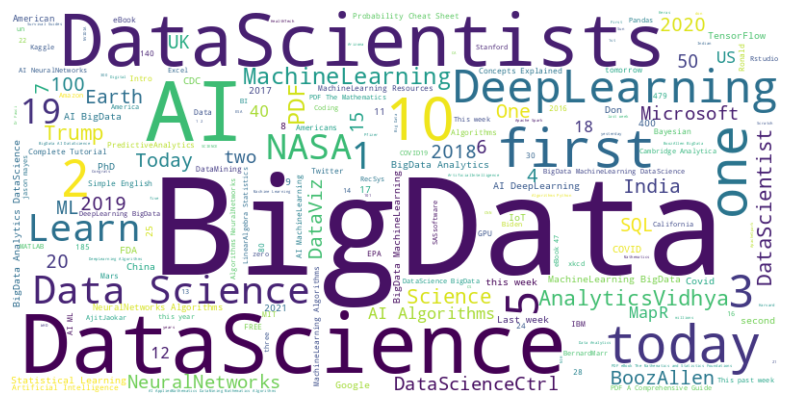

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the named entities and their labels from the 'ner' column
named_entities = [entity for row in ner_df['ner'] for entity in row]

# Create a dictionary to store the frequency of each named entity
entity_frequencies = {}
for entity, label in named_entities:
    entity_frequencies[entity] = entity_frequencies.get(entity, 0) + 1

# Create a WordCloud object using the entity frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(entity_frequencies)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Bar chart for NER labels

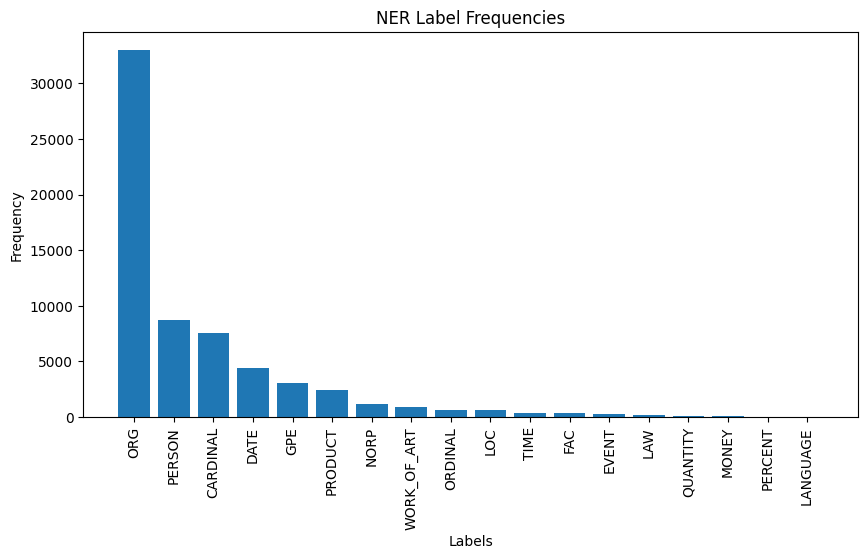

In [ ]:
import matplotlib.pyplot as plt

# Extract the labels from the 'ner' column in the ner_df DataFrame
labels = [label for item in ner_df['ner'] for _, label in item]

# Create a dictionary to store the frequency of each label
label_frequencies = {}
for label in labels:
    label_frequencies[label] = label_frequencies.get(label, 0) + 1

# Sort the labels and frequencies in descending order
sorted_labels = sorted(label_frequencies, key=label_frequencies.get, reverse=True)
sorted_frequencies = [label_frequencies[label] for label in sorted_labels]

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(sorted_labels, sorted_frequencies)

# Set labels and title
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('NER Label Frequencies')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Display the bar chart
plt.show()


## Train and Classification (NEW)

In [ ]:
filtered_df

id      conversation_id               created_at  \
0       1406400408545804288  1406400396264943616  2021-06-20 05:26:01 IST   
2       1406386311481774083  1406386311481774083  2021-06-20 04:30:00 IST   
10      1406333930551324673  1406333930551324673  2021-06-20 01:01:52 IST   
27      1406320816028098561  1406320816028098561  2021-06-20 00:09:45 IST   
37      1406311453901168640  1406311453901168640  2021-06-19 23:32:33 IST   
...                     ...                  ...                      ...   
240548    38813309901742080    38813309901742080  2011-02-19 09:43:08 IST   
240648    29743860900958208    29743860900958208  2011-01-25 09:04:23 IST   
240806     2933205946597376     2933205946597376  2010-11-12 09:28:25 IST   
241101          16480391385          16480391385  2010-06-18 21:31:10 IST   
241157          15271575408          15271575408  2010-06-03 00:46:45 IST   

              date      time  timezone              user_id         username  \
0       2021-06-20  05:26:01       530  1113747629282930688  ballouxfrancois   
2       2021-06-20  04:30:00       530             19402238      sciencenews   
10      2021-06-20  01:01:52       530            534563976       kirkdborne   
27      2021-06-20  00:09:45       530            534563976       kirkdborne   
37      2021-06-19  23:32:33       530            329972029           edtubb   
...            ...       ...       ...                  ...              ...   
240548  2011-02-19  09:43:08       530              2384071       timoreilly   
240648  2011-01-25  09:04:23       530              5988062     theeconomist   
240806  2010-11-12  09:28:25       530              2384071       timoreilly   
241101  2010-06-18  21:31:10       530              2384071       timoreilly   
241157  2010-06-03  00:46:45       530              2384071       timoreilly   

                         name place  ... reply_to retweet_date translate  \
0       Prof Francois Balloux   NaN  ...       []          NaN       NaN   
2                Science News   NaN  ...       []          NaN       NaN   
10                 Kirk Borne   NaN  ...       []          NaN       NaN   
27                 Kirk Borne   NaN  ...       []          NaN       NaN   
37                    Ed Tubb   NaN  ...       []          NaN       NaN   
...                       ...   ...  ...      ...          ...       ...   
240548             timoreilly   NaN  ...       []          NaN       NaN   
240648          The Economist   NaN  ...       []          NaN       NaN   
240806             timoreilly   NaN  ...       []          NaN       NaN   
241101             timoreilly   NaN  ...       []          NaN       NaN   
241157             timoreilly   NaN  ...       []          NaN       NaN   

       trans_src trans_dest  \
0            NaN        NaN   
2            NaN        NaN   
10           NaN        NaN   
27           NaN        NaN   
37           NaN        NaN   
...          ...        ...   
240548       NaN        NaN   
240648       NaN        NaN   
240806       NaN        NaN   
241101       NaN        NaN   
241157       NaN        NaN   

                                           cleaned_tweets  sentiment  \
0       What can be done Never blindly trust an abstra...   Positive   
2       Using high resolution satellite data and compu...   Negative   
10      Trends in AI for next 5 years including revenu...    Neutral   
27      ApacheSpark Basics in 7 10 minute tutorials ab...    Neutral   
37      The Science Table estimates for Delta spread c...   Positive   
...                                                   ...        ...   
240548  Great job by jakeporway teasing apart themes f...   Positive   
240648  Science in Singapore Real time data about a ci...   Positive   
240806  Top 3 In a Nutshell books in recent oreillymed...   Positive   
241101  RT sarawinge Seminal post on data science from...    Neutral   
241157  What is data science by mikeloukides is a semi...   P

In [ ]:
#Define the features (X) and label (Y)
X = filtered_df.cleaned_tweets
y = filtered_df.sentiment

In [ ]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('the length of X_train is now:',len(X_train))
print('the length of X_test is now:',len(X_test))
print('the length of y_train is now:',len(y_train))
print('the length of y_test is now:',len(y_test))

the length of X_train is now: 20780
the length of X_test is now: 5196
the length of y_train is now: 20780
the length of y_test is now: 5196


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_clean = tfidf_transformer.fit_transform(X_train_dtm)

In [ ]:
#Import ML algorithm from Scikit learn library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
Classifiers = [
{
   'label': 'Logistic Regression',
   'model': LogisticRegression(C=0.00000001,solver='liblinear',max_iter=200, multi_class='auto'),
},
{
    'label': 'SGD Classifier',
    'model': SGDClassifier(loss='log', warm_start=True, max_iter=1000, l1_ratio=0.03, penalty='l2', alpha=1e-4, fit_intercept=False),
},
{
    'label': 'KNeighbours',
    'model': KNeighborsClassifier(n_neighbors=15),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(max_depth=10,random_state=101,max_features= None,min_samples_leaf=15),
},
{
   'label': 'Random Forest',
   'model': RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1,random_state=101,max_features= None,min_samples_leaf = 30),
}
]

In [ ]:
accuracies=[]
models=[]
predictions = []
for c in Classifiers:
    try:
        classifier = c['model']
        fit = classifier.fit(X_train_clean, y_train)
        pred = fit.predict(X_test_dtm)
    except Exception:
        fit = classifier.fit(X_train_clean, y_train)
        pred = fit.predict(X_test_dtm)
    predictions.append(pred)
    accuracy = accuracy_score(pred,y_test)
    accuracies.append(accuracy)
    models.append(c['label'])
    print('Accuracy of '+c['label']+' is '+str(accuracy))

Accuracy of Logistic Regression is 0.5259815242494227
Accuracy of SGD Classifier is 0.716320246343341


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy of KNeighbours is 0.6401077752117013
Accuracy of Decision Tree is 0.7076597382602001
Accuracy of Random Forest is 0.6809083910700539


### Accuracies Chart

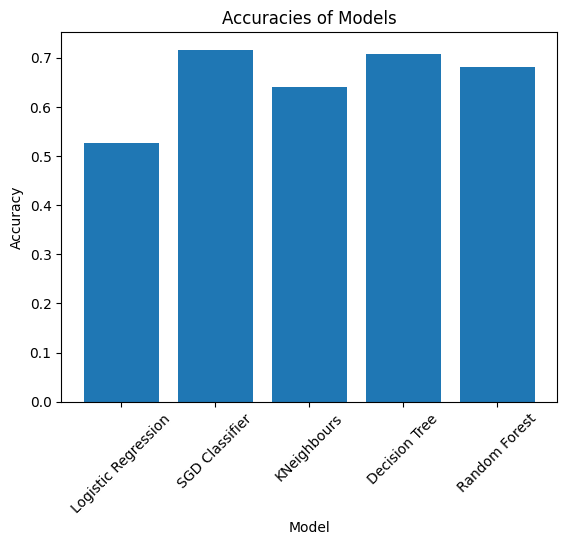

In [ ]:
import matplotlib.pyplot as plt
Index = [1,2,3,4,5]
plt.bar(Index,accuracies)
plt.xticks(Index, models,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show()

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

for p in predictions:
    cm = confusion_matrix(y_test, p)
    print(cm)

[[   0    0  561]
 [   0    0 1902]
 [   0    0 2733]]
[[  12  241  308]
 [   0 1694  208]
 [   1  716 2016]]
[[  76  286  199]
 [  10 1630  262]
 [  24 1089 1620]]
[[  84  209  268]
 [   1 1653  248]
 [  13  780 1940]]
[[  62  398  101]
 [   0 1876   26]
 [   9 1124 1600]]


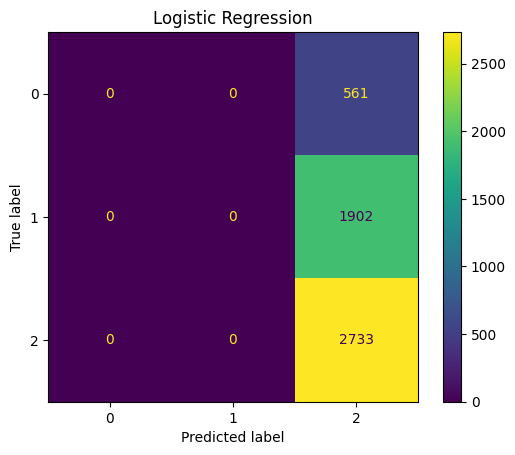

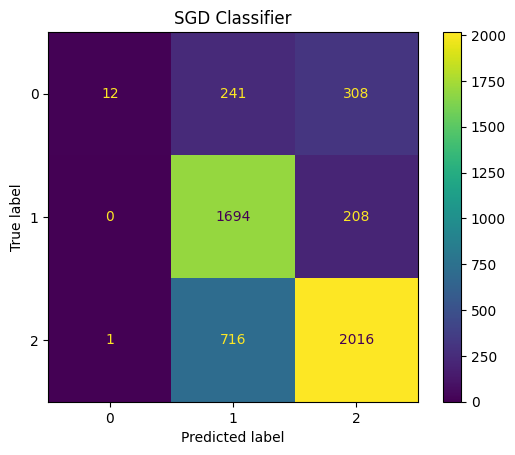

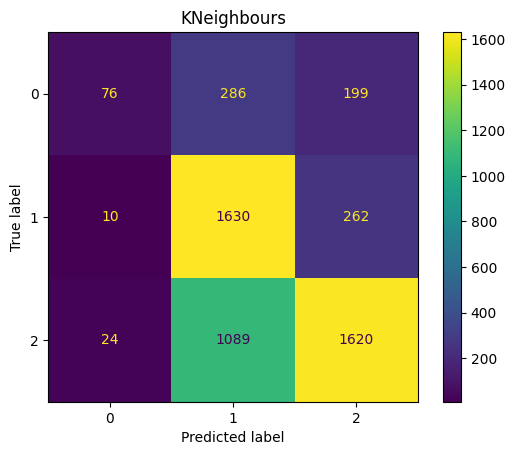

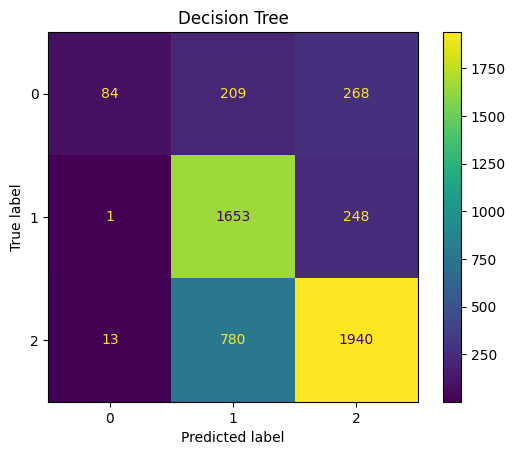

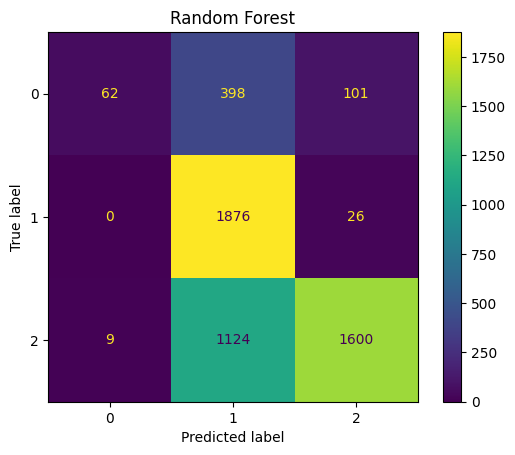

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

for i,p in enumerate(predictions):
    cm = confusion_matrix(y_test, p, labels=fit.classes_)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(values_format='g')
    disp.ax_.set_title(Classifiers[i]['label'])

plt.show()

### precision score for each classifers.

In [ ]:
from sklearn.metrics import precision_score

for i,p in enumerate(predictions):
    prec_score = precision_score(y_test, p, average='weighted')
    print(f"The precision score of {Classifiers[i]['label']} is {prec_score}")

The precision score of Logistic Regression is 0.276656563851746
The precision score of SGD Classifier is 0.7523614242983602
The precision score of KNeighbours is 0.6826143515165363
The precision score of Decision Tree is 0.7370419390844414
The precision score of Random Forest is 0.7836763530815318


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Recall score for each classifers.

In [ ]:
from sklearn.metrics import recall_score

for i,p in enumerate(predictions):
    recall = recall_score(y_test, p, average='weighted')
    print(f"The recall score of {Classifiers[i]['label']} is {recall}")

The recall score of Logistic Regression is 0.5259815242494227
The recall score of SGD Classifier is 0.716320246343341
The recall score of KNeighbours is 0.6401077752117013
The recall score of Decision Tree is 0.7076597382602001
The recall score of Random Forest is 0.6809083910700539


### F1 score for each classifers.

In [ ]:
from sklearn.metrics import f1_score

for i,p in enumerate(predictions):
    f1 = f1_score(y_test, p, average='weighted')
    print(f"The F1 score of {Classifiers[i]['label']} is {f1}")

The F1 score of Logistic Regression is 0.36259490623626484
The F1 score of SGD Classifier is 0.679704739913833
The F1 score of KNeighbours is 0.6216510995249752
The F1 score of Decision Tree is 0.687140787056575
The F1 score of Random Forest is 0.6577057224922825


# Mentions Analysis

In [ ]:
import pandas as pd

df = pd.read_csv("/content/datasets/data-science-tweets/tweets/data_science.csv")
df.head()

<ipython-input-79-c8375d26d3f6>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/datasets/data-science-tweets/tweets/data_science.csv")


id      conversation_id               created_at  \
0  1406400408545804288  1406400396264943616  2021-06-20 05:26:01 IST   
1  1406390341176016897  1406390341176016897  2021-06-20 04:46:01 IST   
2  1406386311481774083  1406386311481774083  2021-06-20 04:30:00 IST   
3  1406383545153638402  1406383545153638402  2021-06-20 04:19:01 IST   
4  1406358632648818689  1406358632648818689  2021-06-20 02:40:01 IST   

         date      time  timezone              user_id         username  \
0  2021-06-20  05:26:01       530  1113747629282930688  ballouxfrancois   
1  2021-06-20  04:46:01       530   788898706586275840     tdatascience   
2  2021-06-20  04:30:00       530             19402238      sciencenews   
3  2021-06-20  04:19:01       530   788898706586275840     tdatascience   
4  2021-06-20  02:40:01       530   788898706586275840     tdatascience   

                    name place  ... geo source user_rt_id user_rt retweet_id  \
0  Prof Francois Balloux   NaN  ... NaN    NaN        NaN     NaN        NaN   
1   Towards Data Science   NaN  ... NaN    NaN        NaN     NaN        NaN   
2           Science News   NaN  ... NaN    NaN        NaN     NaN        NaN   
3   Towards Data Science   NaN  ... NaN    NaN        NaN     NaN        NaN   
4   Towards Data Science   NaN  ... NaN    NaN        NaN     NaN        NaN   

   reply_to  retweet_date  translate trans_src trans_dest  
0        []           NaN        NaN       NaN        NaN  
1        []           NaN        NaN       NaN        NaN  
2        []           NaN        NaN       NaN        NaN  
3        []           NaN        NaN       NaN        NaN  
4        []           NaN        NaN       NaN        NaN  

[5 rows x 36 columns]

In [ ]:
df = df[['id','conversation_id','user_id','name','tweet','replies_count','likes_count','retweets_count','mentions']]
df

id      conversation_id              user_id  \
0       1406400408545804288  1406400396264943616  1113747629282930688   
1       1406390341176016897  1406390341176016897   788898706586275840   
2       1406386311481774083  1406386311481774083             19402238   
3       1406383545153638402  1406383545153638402   788898706586275840   
4       1406358632648818689  1406358632648818689   788898706586275840   
...                     ...                  ...                  ...   
241381           7516204805           7516204805             20611338   
241382           7445162404           7445162404              6806592   
241383           7423411210           7423332793              1315431   
241384           7376226272           7376226272             22105603   
241385           7333962778           7333962778             16997044   

                         name  \
0       Prof Francois Balloux   
1        Towards Data Science   
2                Science News   
3        Towards Data Science   
4        Towards Data Science   
...                       ...   
241381            Paul Vieira   
241382             Pedro Dias   
241383          Liz   Strauss   
241384       Natasha Mitchell   
241385               BBH Labs   

                                                    tweet  replies_count  \
0       What can be done?  - Never blindly trust an ab...              6   
1       "We need a paradigm shift from model-centric t...              0   
2       Using high-resolution satellite data and compu...              2   
3       .@Stephenson_Data shares four steps that will ...              0   
4       "Curricula is inherently brittle in a world wh...              0   
...                                                   ...            ...   
241381  Cda jobs data, Dec: employment rose in health,...              0   
241382  RT @filiber: Have a Computer Science backgroun...              0   
241383  @pop17 Heck with science. I've got empirical d...              0   
241384  All in the....data RT @noahWG Dr. Petra provid...              0   
241385  “The world of retail will always be a mix of a...              0   

        likes_count  retweets_count  \
0               144              10   
1                27               7   
2                49              11   
3                 6               3   
4                 9               1   
...             ...             ...   
241381            0               0   
241382            0               0   
241383            0               0   
241384            0               0   
241385           11               2   

                                                 mentions  
0                                                      []  
1                                                      []  
2                                                      []  
3       [{'screen_name': 'stephenson_data', 'name': 'd...  
4       [{'screen_name': 'russ_poll', 'name': 'russell...  
...                                                   ...  
241381                                                 []  
241382  [{'screen_name': 'filiber', 'name': 'fili ', '...  
241383                                                 []  
241384  [{'screen_name': 'noahwg', 'name': 'noah gray'...  
241385                                                 []  

[241386 rows x 9 columns]

In [ ]:
#filtering all tweets without mentions
df = df[df['mentions'].apply(lambda x: len(x)>2)]

In [ ]:
import json
# Convert string to a list of dicts in the mentions column
def convert_json_strings_to_list(df, column_name):
    def parse_json_string(json_str):
        try:
            return json.loads(json_str.replace("'", '"'))
        except json.JSONDecodeError:
            return None

    df[column_name] = df[column_name].apply(parse_json_string)
    df = df.dropna(subset=[column_name])

convert_json_strings_to_list(df, 'mentions')

<ipython-input-82-40ac3af877dd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(parse_json_string)


In [ ]:
#Creating a column named mention_names
def extract_mention_names(df, column_name):
    df['mention_names'] = df[column_name].apply(lambda x: [mention['name'] for mention in x if mention is not None] if x is not None else [])

extract_mention_names(df, 'mentions')

<ipython-input-83-2552c5e05da4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mention_names'] = df[column_name].apply(lambda x: [mention['name'] for mention in x if mention is not None] if x is not None else [])


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df

id      conversation_id             user_id  \
3       1406383545153638402  1406383545153638402  788898706586275840   
4       1406358632648818689  1406358632648818689  788898706586275840   
6       1406344023254634499  1405541746675572749           534563976   
7       1406341015963799553  1406341015963799553           534563976   
8       1406335152247214089  1406335152247214089           534563976   
...                     ...                  ...                 ...   
241369           7800318226           7800318226            32372834   
241376           7685436378           7685436378            15168790   
241378           7646039868           7646039868            18655567   
241382           7445162404           7445162404             6806592   
241384           7376226272           7376226272            22105603   

                        name  \
3       Towards Data Science   
4       Towards Data Science   
6                 Kirk Borne   
7                 Kirk Borne   
8                 Kirk Borne   
...                      ...   
241369      Science Magazine   
241376      Tufts University   
241378       Steve Silberman   
241382            Pedro Dias   
241384      Natasha Mitchell   

                                                    tweet  replies_count  \
3       .@Stephenson_Data shares four steps that will ...              0   
4       "Curricula is inherently brittle in a world wh...              0   
6       @LinkLabsInc @IoTchannel Wow! Wonderful!! Cong...              0   
7       Register now and build your #HPEDiscover 2021 ...              1   
8       What is #ModelOps vs. #MLOps? “ModelOps is key...              0   
...                                                   ...            ...   
241369  RT @ScienceInsider: New Science "Indicators" D...              0   
241376  RT @djmcsquared: @TuftsUniversity @sarasous 's...              0   
241378  Science, schmience, Jenny McCarthy demands mor...              0   
241382  RT @filiber: Have a Computer Science backgroun...              0   
241384  All in the....data RT @noahWG Dr. Petra provid...              0   

        likes_count  retweets_count  \
3                 6               3   
4                 9               1   
6                 1               1   
7                 3               6   
8                 6               2   
...             ...             ...   
241369            1               0   
241376            0               0   
241378            0               3   
241382            0               0   
241384            0               0   

                                                 mentions  \
3       [{'screen_name': 'stephenson_data', 'name': 'd...   
4       [{'screen_name': 'russ_poll', 'name': 'russell...   
6       [{'screen_name': 'iotchannel', 'name': 'iot ch...   
7       [{'screen_name': 'hpe', 'name': 'hpe', 'id': '...   
8       [{'screen_name': 'modelop_co', 'name': 'modelo...   
...                                                   ...   
241369  [{'screen_name': 'scienceinsider', 'name': 'sc...   
241376  [{'screen_name': 'djmcsquared', 'name': 'the d...   
241378  [{'screen_name': 'matthiasrascher', 'name': 'm...   
241382  [{'screen_name': 'filiber', 'name': 'fili ', '...   
241384  [{'screen_name': 'noahwg', 'name': 'noah gray'...   

                                            mention_names  
3                                  [david stephenson phd]  
4                                       [russell pollari]  
6         [iot channel of @iotcommunity®, iot community®]  
7            [hpe, hpe ezmeral software, hpe iot, hpe ai]  
8                                               [modelop]  
...                                                   ...  
241369                                   [scienceinsider]  
241376  [the duke of new york, tufts university, sara su]  
241378                                 [matthias rascher]  
241382                                            [fili ]  


In [ ]:
import re

# Clean the 'mention_names' column
df['mention_names'] = df['mention_names'].apply(lambda names: [re.sub(r'[^a-zA-Z\s]', '', name) for name in names])
df

<ipython-input-86-d71bb958f3ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mention_names'] = df['mention_names'].apply(lambda names: [re.sub(r'[^a-zA-Z\s]', '', name) for name in names])


id      conversation_id             user_id  \
3       1406383545153638402  1406383545153638402  788898706586275840   
4       1406358632648818689  1406358632648818689  788898706586275840   
6       1406344023254634499  1405541746675572749           534563976   
7       1406341015963799553  1406341015963799553           534563976   
8       1406335152247214089  1406335152247214089           534563976   
...                     ...                  ...                 ...   
241369           7800318226           7800318226            32372834   
241376           7685436378           7685436378            15168790   
241378           7646039868           7646039868            18655567   
241382           7445162404           7445162404             6806592   
241384           7376226272           7376226272            22105603   

                        name  \
3       Towards Data Science   
4       Towards Data Science   
6                 Kirk Borne   
7                 Kirk Borne   
8                 Kirk Borne   
...                      ...   
241369      Science Magazine   
241376      Tufts University   
241378       Steve Silberman   
241382            Pedro Dias   
241384      Natasha Mitchell   

                                                    tweet  replies_count  \
3       .@Stephenson_Data shares four steps that will ...              0   
4       "Curricula is inherently brittle in a world wh...              0   
6       @LinkLabsInc @IoTchannel Wow! Wonderful!! Cong...              0   
7       Register now and build your #HPEDiscover 2021 ...              1   
8       What is #ModelOps vs. #MLOps? “ModelOps is key...              0   
...                                                   ...            ...   
241369  RT @ScienceInsider: New Science "Indicators" D...              0   
241376  RT @djmcsquared: @TuftsUniversity @sarasous 's...              0   
241378  Science, schmience, Jenny McCarthy demands mor...              0   
241382  RT @filiber: Have a Computer Science backgroun...              0   
241384  All in the....data RT @noahWG Dr. Petra provid...              0   

        likes_count  retweets_count  \
3                 6               3   
4                 9               1   
6                 1               1   
7                 3               6   
8                 6               2   
...             ...             ...   
241369            1               0   
241376            0               0   
241378            0               3   
241382            0               0   
241384            0               0   

                                                 mentions  \
3       [{'screen_name': 'stephenson_data', 'name': 'd...   
4       [{'screen_name': 'russ_poll', 'name': 'russell...   
6       [{'screen_name': 'iotchannel', 'name': 'iot ch...   
7       [{'screen_name': 'hpe', 'name': 'hpe', 'id': '...   
8       [{'screen_name': 'modelop_co', 'name': 'modelo...   
...                                                   ...   
241369  [{'screen_name': 'scienceinsider', 'name': 'sc...   
241376  [{'screen_name': 'djmcsquared', 'name': 'the d...   
241378  [{'screen_name': 'matthiasrascher', 'name': 'm...   
241382  [{'screen_name': 'filiber', 'name': 'fili ', '...   
241384  [{'screen_name': 'noahwg', 'name': 'noah gray'...   

                                            mention_names  
3                                  [david stephenson phd]  
4                                       [russell pollari]  
6            [iot channel of iotcommunity, iot community]  
7            [hpe, hpe ezmeral software, hpe iot, hpe ai]  
8                                               [modelop]  
...                                                   ...  
241369                                   [scienceinsider]  
241376  [the duke of new york, tufts university, sara su]  
241378                                 [matthias rascher]  
241382                                            [fili ]  


## Most common mentions

In [ ]:
from collections import Counter

# Flatten the 'mention_names' column into a single list
flatten_names = [name for sublist in df['mention_names'] for name in sublist]

# Count the occurrences of each name
name_counts = Counter(flatten_names)

# Get the top most mentioned names
top_mentioned_names = name_counts.most_common()

top_mentioned_names


[('data science central', 5702),
 ('booz allen hamilton', 4764),
 ('mapr', 2208),
 ('kdnuggets', 1798),
 ('michael fisher', 1194),
 ('sas software', 1130),
 ('kirk borne', 1114),
 ('mike quindazzi ', 1057),
 ('open data science', 953),
 ('ronald van loon', 799),
 ('kaggle', 784),
 ('analytics vidhya', 777),
 ('dean of big data  dobd', 739),
 ('booz data science', 716),
 ('', 703),
 ('dean anthony gratton', 667),
 ('dataiku', 644),
 ('sarahjayne gratton', 628),
 ('forbes', 627),
 ('nvidia', 544),
 ('ipfconline', 472),
 ('bernard marr', 446),
 ('antonio grasso', 431),
 ('databricks', 399),
 ('ajit jaokar', 399),
 ('nasa', 397),
 ('datanami', 376),
 ('tableau software', 362),
 ('bob e hayes', 348),
 ('harvard business review', 335),
 ('gartner', 328),
 ('machine learning mastery', 302),
 ('lentiq', 292),
 ('ai', 288),
 ('life at booz allen', 279),
 ('nvidia ai', 271),
 ('venturebeat', 270),
 ('towards data science', 268),
 ('dr ganapathi pulipaka ', 263),
 ('microsoft', 261),
 ('the alan 

### WordCloud for most mentioned names

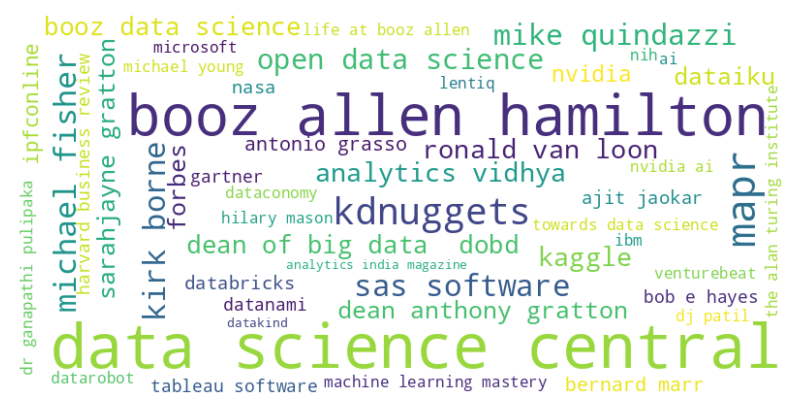

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the 'mention_names' column into a single list
flatten_names = [name for sublist in df['mention_names'] for name in sublist]

# Count the occurrences of each name
name_counts = Counter(flatten_names)

# Get the top 50 most mentioned names
top_50_mentioned_names = name_counts.most_common(50)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_50_mentioned_names))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()